<a href="https://colab.research.google.com/github/R267/indz_analys/blob/main/indz3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
chaunguynnghunh_sepsis_path = kagglehub.dataset_download('chaunguynnghunh/sepsis')

print('Data source import complete.')


Data source import complete.


<h1 style='color:#4472C4;font-size:60px;font-family:helvetica;text-align:center;'>
    <strong>
    Sepsis Prediction
    </strong>
</h1>

<h3 style='color:#4472C4;font-size:30px;font-family:helvetica;text-align:center;'>
Aвтор:
</h3>

<h4 style='color:#000000;font-size:30px;font-family:helvetica;text-align:center;'>
Нгуєн Данг Хуен Чау
</h4>


<h2 style='color:#4472C4;font-size:45px;font-family:helvetica;text-align:center;'>
    <strong>
    Table of Content
    </strong>
</h2>

I. Вступ
1.1. Постановка задачі

1.2. Налаштування

1.3. Імпортування набору даних

1.4. Інформація про дані

<br>
II. Дослідження даних
2.1. Відсутні та дубліковані значення

2.2. Описова статистика та центральні тенденції

2.3. Інсайти

2.4. Вибірки

<br>
III. Очищення даних та інженерія ознак
3.1. Видалення колонок ID, Insurance та перейменування помилково написаної колонки Sepsis

3.2. Бінарне кодування для колонки Sepsis

3.3. Видалення дублікатів

3.4. Обробка відсутніх значень

3.5. Обробка вибірок та зміщення даних

<br>
IV. Створення моделі
<br>
V. Висновок
<br>
VI. Джерела

<a id='I'></a>
<h2 style='color:#4472C4;font-size:45px;font-family:helvetica;text-align:center;'>
    <strong>
    I. Вступ
    </strong>
</h2>

*текст курсивом*<a id='1.1'></a>
### **1.1.** Постановка задачі:


***

Сепсис — це стан, коли організм людини надмірно реагує на вже наявну інфекцію, що спричиняє ланцюгову реакцію системних збоїв в легенях, сечовивідних шляхах, шкірі або шлунково-кишковому тракті. Сепсис є фатальним і потребує негайної медичної допомоги. Відділення інтенсивної терапії (ОІТ) перебувають під стресом через необхідність моніторингу розвитку сепсису у пацієнтів. Модель машинного навчання для прогнозування ймовірності розвитку сепсису у пацієнтів на основі їх медичної історії є важливою для запобігання будь-яким загрозливим для життя ускладненням від сепсису  [[1]](#1).

<a id='1.2'></a>
### **1.2.** Встановлення
***

In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 19.2 MB/s eta 0:00:00


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sepsis/Paitients_Files_Train.csv
/kaggle/input/sepsis/Paitients_Files_Test.csv
/kaggle/input/sepsis/README.md


In [4]:
# Import necessary libraries
import pandas as pd # For dataframe
import numpy as np
import matplotlib.pyplot as plt # For plots
import seaborn as sns # For plots

# Import scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report


#Libraries for feature scaling
from sklearn.preprocessing import StandardScaler

#Libraries for Validation
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score


# Initial Setup
%matplotlib inline

plt.rcParams["figure.figsize"] = 10, 5 # Set default figure size

sns.set_theme(style='whitegrid', palette='ch:s=.25,rot=-.25') # Set theme for Seaborn plots

<a id='1.3'></a>
### **1.3.** Імпорт датасетів
***

In [5]:
train_set_path = '/content/Paitients_Files_Train.csv'
test_set_path = '/content/Paitients_Files_Test.csv'

sepsis_train_df = pd.read_csv(train_set_path)

sepsis_test_df = pd.read_csv(test_set_path)

print('The shape of the train set: ' + str(sepsis_train_df.shape))
print('The shape of the test set: ' + str(sepsis_test_df.shape))

The shape of the train set: (599, 11)
The shape of the test set: (169, 10)


✍ Спостереження:
Навчальний набір містить 11 стовпців (атрибутів) та 599 рядків (записів).

Тестовий набір містить 10 стовпців та 169 записів.

<a id='1.3.1'></a>
#### **1.3.1** Навчальний набір
***

In [6]:
# View 5 random entries from train set
sepsis_train_df.sample(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
204,ICU200214,6,103,72,32,190,37.7,0.324,55,1,Negative
387,ICU200397,8,105,100,36,0,43.3,0.239,45,1,Positive
466,ICU200476,0,74,52,10,36,27.8,0.269,22,0,Negative
435,ICU200445,0,141,0,0,0,42.4,0.205,29,1,Positive
254,ICU200264,12,92,62,7,258,27.6,0.926,44,1,Positive


<a id='1.3.2'></a>
#### **1.3.2.** Тестовий набір
***

In [ ]:
# View 5 random entries from test set
sepsis_test_df.sample(5)

<a id='1.4'></a>
### **1.4.** Інформація даних

<a id='1.4.1'></a>
#### **1.4.1** Навчальний набір

In [7]:
sepsis_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


# ✍ Спостереження

Навчальний набір містить 11 стовпців (характеристик) і 599 рядків (записів). Усі стовпці мають 599 непорожніх значень, отже, відсутні явні пропущені значення. Стовпець Seppsis є цільовою характеристикою.

Примітка: Sepssis написано з помилкою і буде виправлено на Sepsis в Розділі 3.1.. Від цього моменту будь-який випадок Sepssis буде називатися лише Sepsis.

<a id='1.4.2'></a>
#### **1.4.2.** Тестовий набір

In [8]:
sepsis_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


# ✍ Спостереження

Тестовий набір містить 10 стовпців (характеристик) і 169 рядків (записів). Усі стовпці мають 169 непорожніх значень, отже, відсутні явні пропущені значення. На відміну від навчального набору, тестовий набір не має стовпця Sepsis.










<a id='1.4.3'</a>
#### **1.4.3.** Резюме атрибутів та галузеві знання










Особливості можна поділити на наступні типи:

Числові:

Безперервні:

PRG: Плазмовий рівень глюкози

3.9 < PRG < 5.6 ($ммоль/л$): Нормальний рівень

5.6 < PRG < 6.9 ($ммоль/л$): Рекомендується моніторинг

PRG > 7.0 ($ммоль/л$): Діабет

[Джерело](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=The%20expected%20values%20for%20normal,(5.6%20mmol%2FL).

PL: Результат аналізу крові-1 ($\mu U/ml$)

Інформація не знайдена

PR: Артеріальний тиск ($мм рт.ст.$)

PR < 90/60 ($мм рт.ст.$): Низький тиск

90/60 < PR < 120/80 ($мм рт.ст.$): Нормальний тиск

PR > 140/90 ($мм рт.ст.$): Високий тиск

Джерело

SK: Результат аналізу крові-2 ($мм$)

Нормальний діапазон: 3.5 - 5.6 (ммоль/л)

Джерело

TS: Результат аналізу крові-3 ($\mu U/ml$)

Нормальний діапазон: 215 - 380 ($мг/дл$)

Джерело.

M11: Індекс маси тіла (вага в $кг$ / (зріст в м)$^2$

M11 < 18.5: Недовага

18.5 < M11 < 24.9: Здоровий ваговий діапазон

25 < M11 < 29.9: Надмірна вага

M11 > 30: Ожиріння

Джерело

BD2: Результат аналізу крові-4 ($\mu U/ml$)

Стандартний діапазон: 7.8 - 500 ($пг/мл$)

Джерело

Дискретні:

Age: Вік пацієнта (роки)

Категоріальні:

Бінарні

Insurance: Чи має пацієнт страхову картку для тестування

Sepsis (Цільова ознака): Чи розвинеться сепсис у пацієнта в ОРІ

Відмова від відповідальності: без наявності медичної або здоров'ястої освіти, представлені вище галузеві знання є суто результатом пошуку в Інтернеті. Оскільки багато медичних показників є скороченнями, а README файл не надає детальної інформації, деякі терміни можуть не відповідати їх точному значенню. Також можуть бути невідповідності одиниць вимірювання, які потребують правильного перерахунку. Ще одне важливе зауваження: більшість джерел надають типовий діапазон нормальних значень для здорових людей, не вказуючи абсолютні мінімальні та максимальні значення, до яких можуть знижуватися ці значення. Оскільки в умовах ОРІ пацієнти часто перебувають у тяжкому стані, їхні показники можуть бути поза типовими межами.

З тим, що було сказано, є деякі загальні міркування, які можна застосувати, такі як значення для цих здоров'ястих показників не повинні бути від'ємними або рівними нулю. Наприклад, неможливо, щоб у живої людини був 0 артеріальний тиск або глюкоза в крові тощо. Галузеві знання повинні дати загальне уявлення при обробці записів із набору даних, таких як виявлення аномалій.

<a id='II'></a>
<h2 style='color:#4472C4;font-size:45px;font-family:helvetica;text-align:center;'>
    <strong>
    II. Дослідницький аналіз даних
    </strong>
</h2>

<a id='2.1'></a>
### **2.1.** Відсутні та повторювані значення
***

<a id='2.1.1'></a>
#### **2.1.1.** Навчальний набір
***

***
# ✍ Спостереження
***
> З [розділу 1.4](#1.4) немає очевидного пропущеного значення, оскільки всі стовпці мають точно таку саму кількість записів, як і форма фрейму даних. Це суперечить інформації, наданій у файлі README набору даних, де зазначено, що є «Відсутнє значення атрибутів». Отже, набір даних потрібно розглянути більш уважно.

In [9]:
sepsis_train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***
# ✍ Спостереження
***
> З описової статистики набору поїздів є кілька стовпців із записами зі значенням 0 - `PRG`, `PL`, `PR`, `SK`, `TS` і `M11`. Згідно з [Доменними знаннями - розділ 1.4.3](#1.4.3), ці стовпці не повинні мати значення 0. Тому розумно припустити, що будь-яке пропущене значення було заповнено 0.

In [10]:
def count_missing_val(df, cols):
  print('\tMissing val Count\tMissing val Percentage')
  for col in cols:
    missing_cnt = df[col].value_counts()[0]
    missing_percentage = round((missing_cnt/len(df) * 100), 2)
    print(str(col) + ': \t\t' + str(missing_cnt) + '\t\t\t' + str(missing_percentage).zfill(5) + '\t%')

In [11]:
count_missing_val(sepsis_train_df, ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11'])

	Missing val Count	Missing val Percentage
PRG: 		93			15.53	%
PL: 		5			00.83	%
PR: 		28			04.67	%
SK: 		175			29.22	%
TS: 		289			48.25	%
M11: 		9			001.5	%


<a id='2.1.2'></a>
#### **2.1.2.** Тестовий набір
***

In [12]:
sepsis_test_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [13]:
count_missing_val(sepsis_test_df, ['PRG', 'PR', 'SK', 'TS'])

	Missing val Count	Missing val Percentage
PRG: 		18			10.65	%
PR: 		7			04.14	%
SK: 		52			30.77	%
TS: 		85			050.3	%


***
# ✍ Спостереження
***
> Подібно до набору поїздів, три стовпці з найбільшою кількістю відсутніх значень – це `TS`, `SK` і `PRG`. Однак, оскільки цей набір використовується для тестування, він залишатиметься недоторканим, тому в тестовому наборі не буде внесено жодних змін.


Перегляд повторюваних записів:

In [14]:
def count_dup_entries(df):
    dup_entries = df.duplicated().sum()
    print('Total number of duplicated entries:\t' + str(dup_entries))

def count_dup_patients(df):
    dup_patients = df.duplicated(subset='ID').sum()
    print('Total number of duplicated patients:\t' + str(dup_patients))

In [15]:
count_dup_entries(sepsis_test_df)
count_dup_patients(sepsis_test_df)

Total number of duplicated entries:	0
Total number of duplicated patients:	0


***
# ✍ Спостереження
***
> Подібно до набору поїздів, у тестовому наборі немає повторюваного запису та дубліката `ID` пацієнта. Отже, немає необхідності турбуватися про дублювання в наборі тестів.


<a id='2.2'></a>
### **2.2.** Описова статистика та центральні тенденції
***

У цьому розділі розглядається розподіл усіх функцій, щоб мати перший погляд на набір даних у цілому. Будь-яка нерівність у розподілі ознак також досліджується, оскільки нерівність може знизити продуктивність моделі, особливо на моделі, що не базується на дереві, такій як логістична регресія (яка є однією з моделей, призначених для використання).

<a id='2.3.1'></a>
#### **2.3.1.** Навчальний набір
***

In [16]:
sepsis_train_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***
# ✍ Спостереження
***
> Усі стовпці, крім `BD2`, мають дуже високі стандартні відхилення, що означає, що вони розповсюджені в дуже широкому діапазоні.
>
> З описової статистики набору поїздів середнє значення та медіана деяких стовпців сильно відрізняються один від одного, особливо в наступних стовпцях: `PRG`, `SK`, `TS`, `BD2`, `Age`. Це вказує на те, що ці стовпці мають нерівність у розподілі. Інші стовпці також мають деякі незначні розбіжності між їхніми середніми значеннями та медіанами, але не такі екстремальні, як згадані вище.


Подальше дослідження асиметрії функцій:

In [17]:
sepsis_train_df.skew(numeric_only=True).sort_values(ascending=False)

,0
TS,2.401585
BD2,1.989472
Age,1.152353
PRG,0.914008
SK,0.164063
PL,0.116180
M11,-0.405255
Insurance,-0.804257
PR,-1.874662


***
# ✍ Спостереження
***
> Нерівність функцій у наборі поїздів можна підсумувати таким чином:
>- Позитивно зміщені: `TS`, `BD2`, `Age`, `PRG`
>- Негативно зміщений: `PR`
>- Нормальний розподіл (приблизно): `SK`, `PL`, `M11`

Буде нанесено гістограми цих характеристик, щоб візуалізувати їх розподіл і підтвердити наведене вище спостереження:

In [18]:
def plot_dist(df, avoid, name_for_title):
    df_copy = df.copy(deep=True) # Copy the original dataframe
    df_copy.drop(labels=avoid, axis='columns',inplace=True) # Drop avoid columns

    # Set up subplots in 3x3 grid
    fig, axes = plt.subplots(3, 3, constrained_layout=True, figsize=(10, 8))

    plt.suptitle('Distribution of Features in ' + name_for_title + ' Set', fontsize=20)

    r = 0 # Track current row
    c = 0 # Track current column

    for col in df_copy.columns:
        # Plot histogram of each column
        sns.histplot(data=df, x=col, kde=True, ax=axes[r, c])
        axes[r, c].title.set_text('Histogram of ' + str(col))

        # Update position for next subplot
        if (c == 2):
            c = 0
            r += 1
        else:
            c += 1

    fig.delaxes(axes[2, 2]) # Delete unused subplot

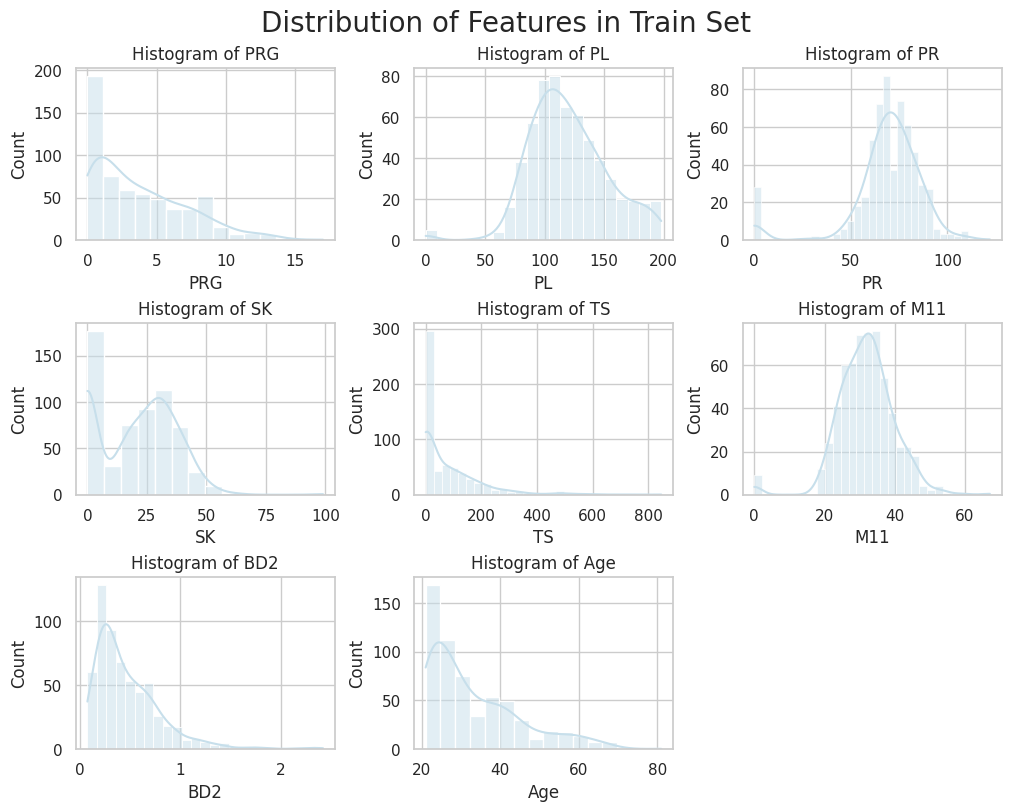

In [19]:
plot_dist(df=sepsis_train_df, avoid=['ID', 'Insurance', 'Sepssis'], name_for_title='Train')

***
# ✍ Спостереження
***
> Відповідно до первинної перевірки, розподіл характеристик є таким:
>- Нахилене вправо: `PRG`, `SK`, `TS`, `BD2`, `Age`.
>- Нормально розподілені: `PL`, `PR`, `M11`.
>
> Асиметрія буде розглянута в наступному розділі шляхом нормалізації даних.

<a id='2.3.2'></a>
#### **2.3.2.** Teстовий набір
***
Подібні кроки застосовано до тестового набору, щоб також отримати певну інформацію про нього.

In [20]:
sepsis_test_df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [21]:
sepsis_test_df.skew(numeric_only=True).sort_values(ascending=False)

,0
TS,1.747436
BD2,1.559577
Age,1.049232
PRG,0.866427
PL,0.531711
SK,-0.096263
M11,-0.520007
Insurance,-1.032858
PR,-1.768116


***
# ✍ Спостереження
***
> Подібно до набору поїздів, стовпці в тестовому наборі також мають дуже велике стандартне відхилення.
>
> Нерівність характеристик у тестовому наборі можна підсумувати таким чином:
>- Позитивно зміщені: `TS`, `BD2`, `Age`, `PRG`
>- Негативно зміщений: `PR`
>- Нормальний розподіл (приблизно): `SK`, `PL`, `M11`

Буде нанесено гістограми цих характеристик, щоб візуалізувати їх розподіл і підтвердити наведене вище спостереження:

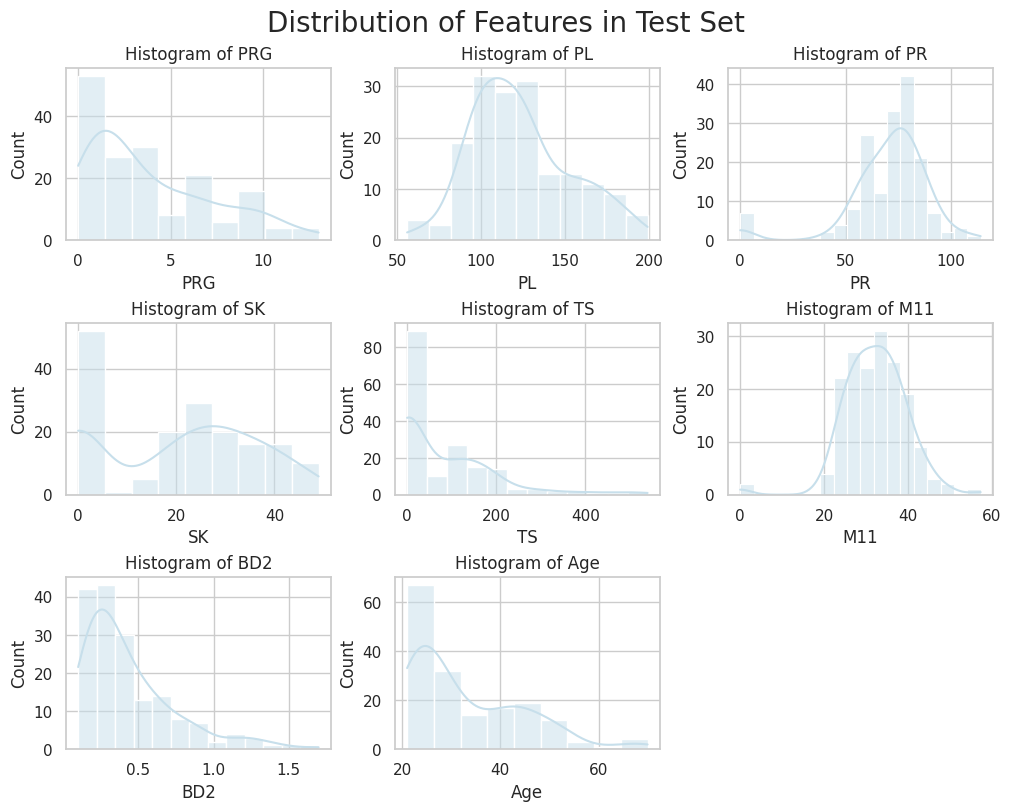

In [22]:
plot_dist(df=sepsis_test_df, avoid=['ID', 'Insurance'], name_for_title='Test')

***
# ✍ Спостереження
***
> Відповідно до первинної перевірки, розподіл характеристик є таким:
>- Нахилене вправо: `PRG`, `SK`, `TS`, `BD2`, `Age`.
>- Нормально розподілені: `PL`, `PR`, `M11`.
>
> Оскільки тестовий набір використовується для перевірки продуктивності моделі на невидимих ​​даних, він буде збережений як є. Над тестовим набором не виконується жодних дій.

<a id='2.4'></a>
### **2.4.** Статистика кожної окремої функції
***

У цьому розділі детальніше розглядається кожна окрема функція, щоб побачити її вплив на розвиток сепсису у пацієнта чи ні. Один із зручних способів зробити це — побудувати поряд значення ознаки у двох випадках (позитивний і негативний із сепсисом). Оскільки всі ознаки є безперервними чисельними, використовується прямокутний графік, оскільки він може чітко показати розподіл, середнє значення та медіану ознак.

**Примітка.** «Страхування» приймає два значення (0 і 1), які вказують, чи має пацієнт тестову медичну страховку чи ні; однак цей стовпець не відіграє жодної ролі в прогнозуванні ймовірності захворювання пацієнтом на сепсис, і пізніше його буде видалено. Таким чином, немає необхідності досліджувати стовпець "Страхування".

In [23]:
def plot_compare_sepsis(df, col):
    plt.figure(figsize=(5, 5))
    plt.title('Comparison of ' + str(col) + ' between sepsis-positive and sepsis-negative patients',
              fontsize=20)

    # Property for the mean marker
    meanline = {'marker':'o', 'markersize':'10'}

    # Box plot of each column separated by Positive and Negative with sepsis
    # Show mean on box plot
    sns.boxplot(data=df, x='Sepssis', y=col, showmeans=True, meanprops=meanline)

    plt.xlabel('Sepsis', size=18)
    plt.ylabel(col, size=18)

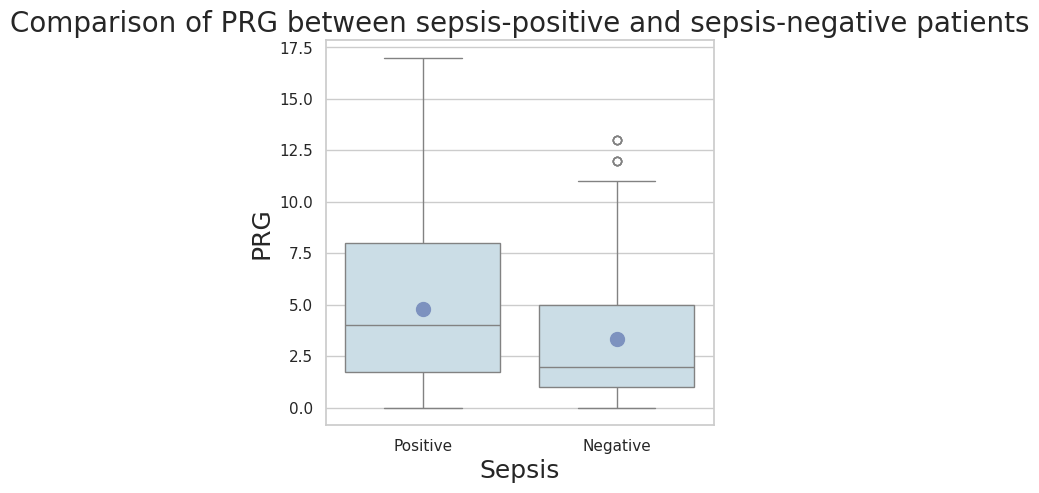

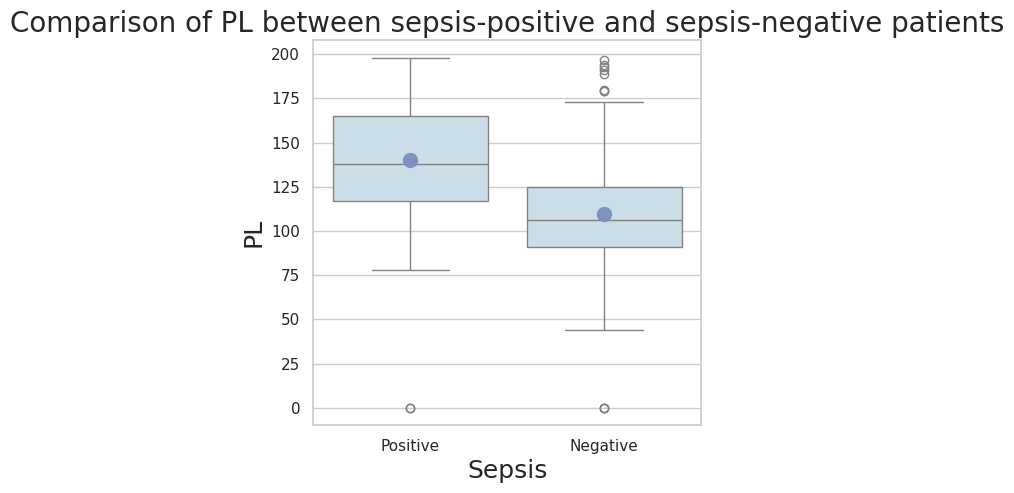

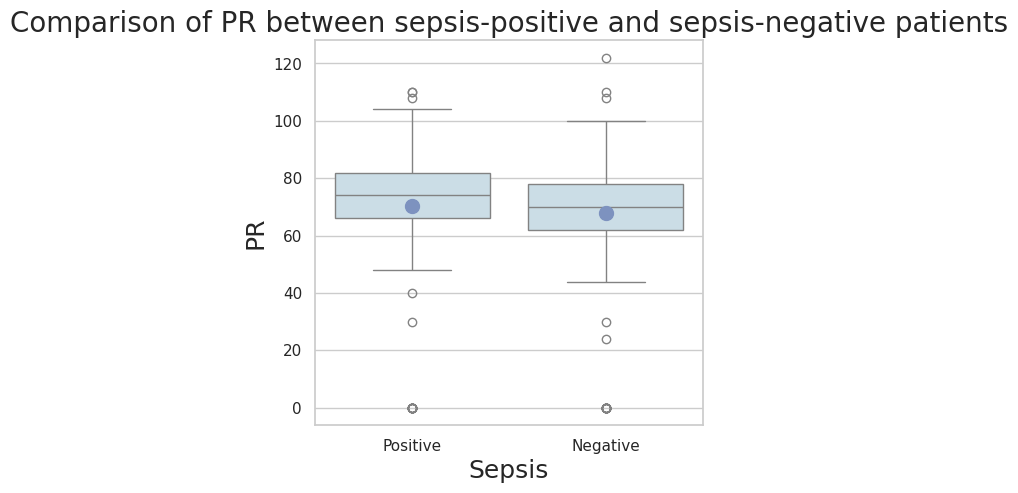

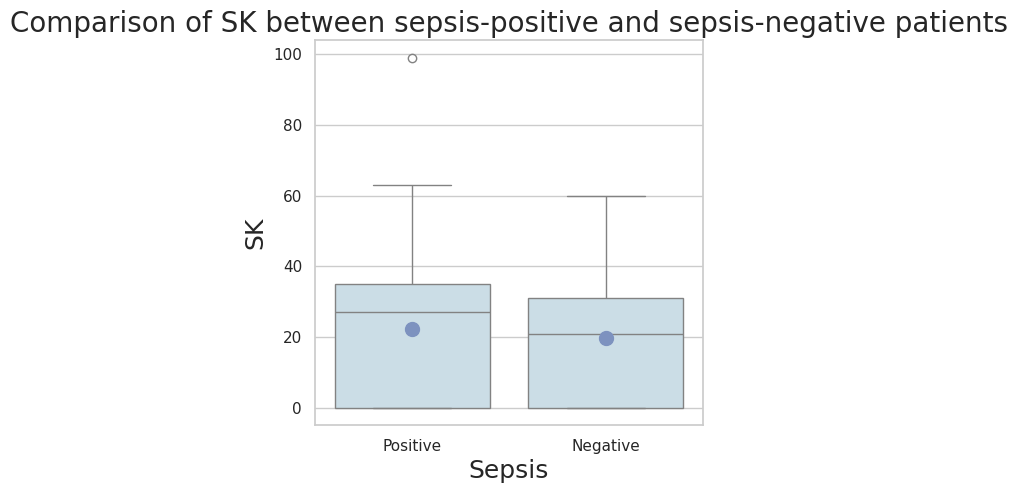

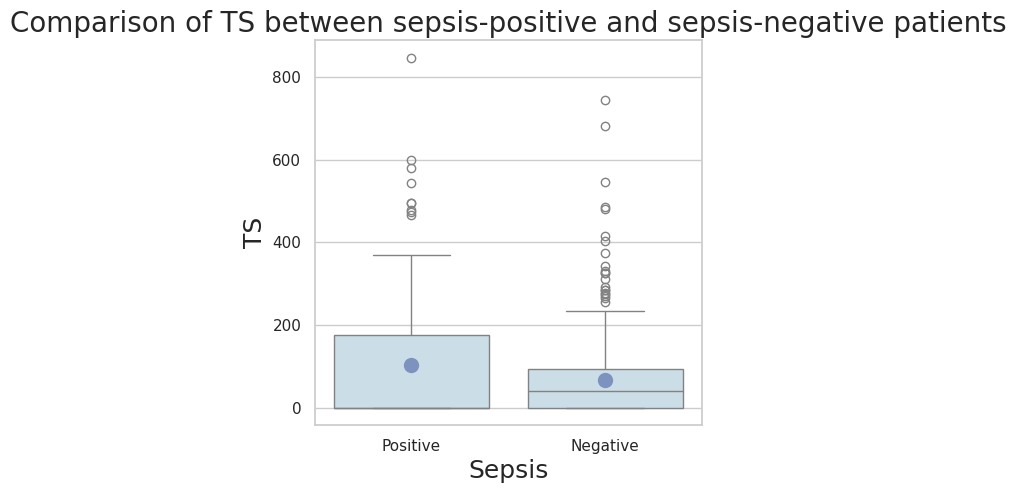

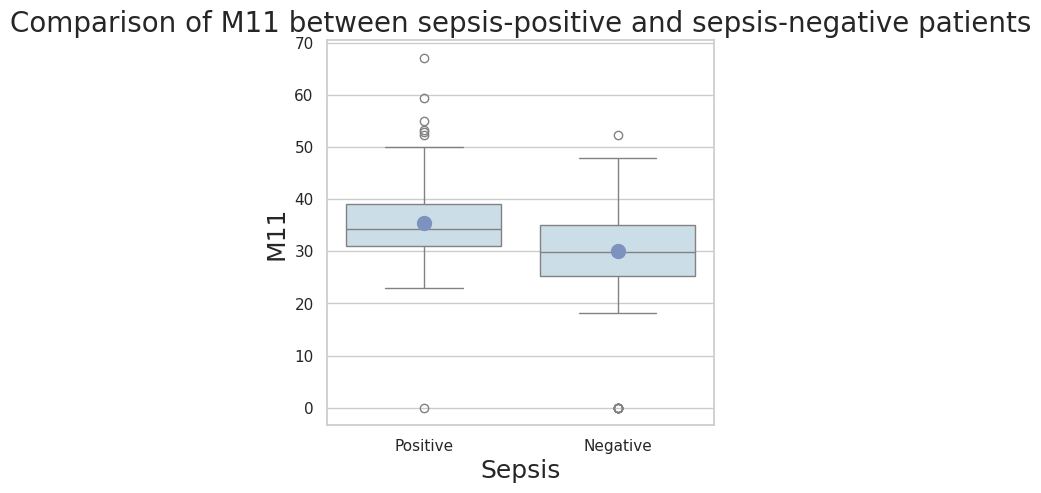

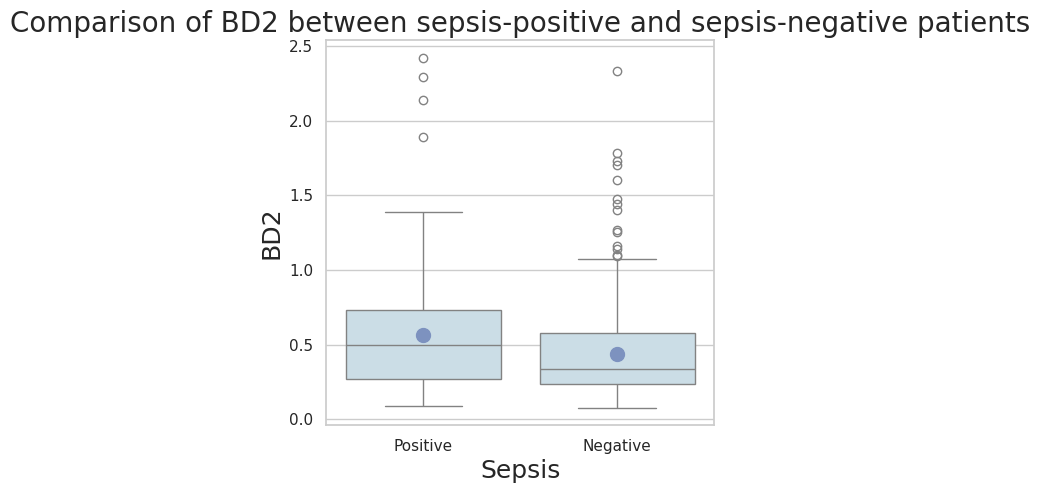

In [24]:
cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2']

for col in cols:
    plot_compare_sepsis(sepsis_train_df, col)

***
# ✍ Спостереження
***
> З графіків порівняння значень різних показників здоров’я між пацієнтами із сепсисом і пацієнтами без сепсису вище можна легко помітити, що пацієнти з позитивним результатом сепсису мають вищі показники за всіма параметрами здоров’я порівняно з негативною групою. Отже, можна зробити обґрунтований висновок, що пацієнти з вищим рівнем глюкози в плазмі, ІМТ та результатами аналізу крові мають більшу ймовірність розвитку сепсису.

На гістограмі порівнюється загальна кількість пацієнтів у різних вікових групах, розділених на позитивні та негативні, щоб побачити, у якій віковій групі найбільше хворих на сепсис:

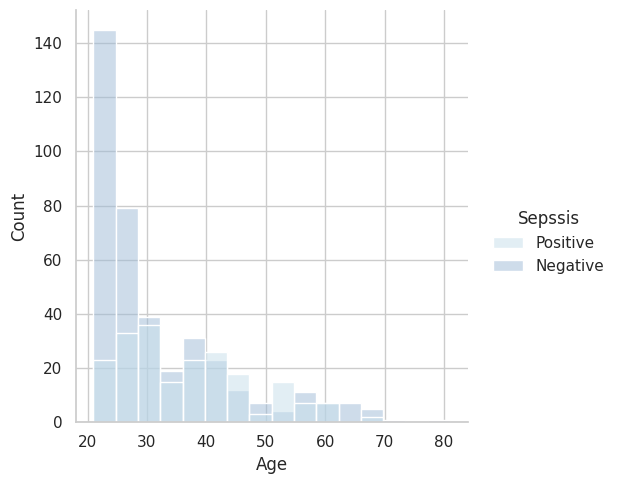

In [25]:
sns.displot(data=sepsis_train_df, x='Age', hue='Sepssis')

***
# ✍ Спостереження
***
> Більшість пацієнтів із сепсисом мають вік від 20 до 45 років. Цілком імовірно, що сепсис має тенденцію до розвитку у пацієнтів молодшого віку.

<a id='2.5'></a>
### **2.5.** Кореляція між ознаками
***
https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

Необхідно досліджувати кореляцію між кожною ознакою, щоб з’ясувати, чи є якась пара ознак сильно корельованою (наприклад, одна ознака може передбачити іншу). Якщо дві функції сильно корельовані, вони, можливо, зайві, і одну слід видалити, щоб зменшити розмірність набору даних і уникнути мультиколінеарності. Для цього завдання виконується статистичний тест на кореляцію: $R$ Пірсона.
$R$ Пірсона перевіряє лінійну кореляцію між двома безперервними змінними. Коефіцієнт кореляції Пірсона $R$ коливається від -1 (абсолютно негативна лінійна кореляція) до 1 (абсолютно позитивна лінійна кореляція), а 0 означає відсутність кореляції між двома змінними.

<a id='2.5.1'></a>
#### **2.5.1.** Навчальний набір
***

<Axes: >

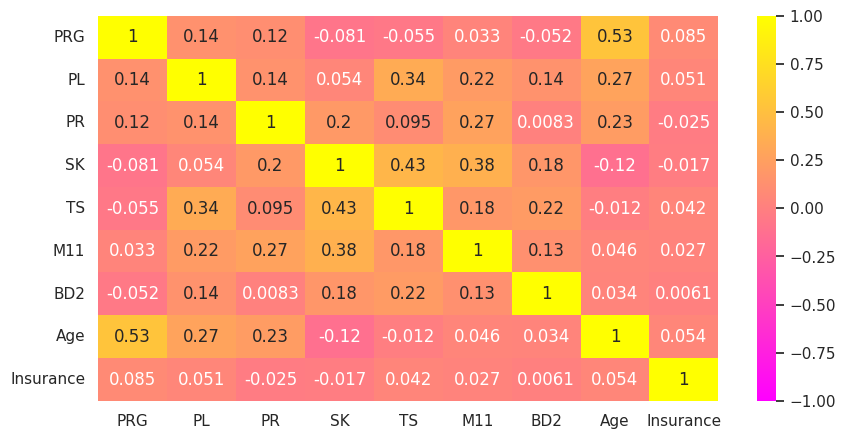

In [27]:
# Select only numeric columns for correlation computation
numeric_columns = sepsis_train_df.select_dtypes(include=[float, int])

# Calculate the Pearson correlation matrix
pearson_r = numeric_columns.corr(method='pearson')

# Plot the heatmap
sns.heatmap(data=pearson_r, vmin=-1, vmax=1, annot=True, cmap='spring')


***
# ✍ Спостереження
***
> З кореляційної теплової карти набору поїздів не так багато кореляцій між функціями. Кореляції досить слабкі, коефіцієнти кореляції коливаються навколо 0,3 або менше. Єдиним винятком є ​​пара Age-PRG ($R=0,53$). Це свідчить про те, що чим старше пацієнт, тим вищий рівень глюкози в плазмі. Однак коефіцієнт кореляції 0,53 не обов’язково є дуже сильним, щоб сказати, що вік може точно передбачити рівень PRG. Тому всі функції будуть збережені.

<a id='2.5.2'></a>
#### **2.5.2.** Тестовий набір
***

<Axes: >

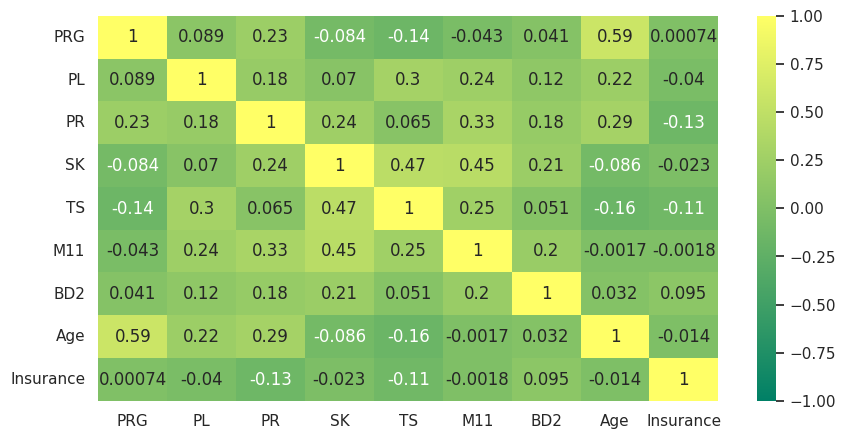

In [29]:
# Select only numeric columns for correlation computation
numeric_columns_test = sepsis_test_df.select_dtypes(include=[float, int])

# Calculate the Pearson correlation matrix
pearson_r_test = numeric_columns_test.corr(method='pearson')

# Plot the heatmap
sns.heatmap(data=pearson_r_test, vmin=-1, vmax=1, annot=True, cmap='summer')


***
# ✍ Спостереження
***
> З тестовим набором спостерігається аналогічна картина. Функції жодним чином не пов’язані одна з одною. Найвища кореляція між віком і рівнем PRG, але вона недостатньо значуща, щоб розглядати можливість вилучення будь-якого стовпця. Таким чином, усі функції будуть збережені.

<a id='2.6'></a>
### **2.6.** Outliers
***
https://medium.com/analytics-vidhya/its-all-about-outliers-cbe172aa1309#:~:text=There%20are%20three%20causes%20for,sampling%20problems%2C%20and%20natural%20variation.

Викиди визначаються за допомогою інтерквартильного діапазону (IQR). Будь-які значення, вищі за $Q3+1,5IQR$ або нижчі за $Q1-1,5IQR$, вважаються викидами, де
- $Q1$ - це $25^{th}$ процентиль даних
- $Q3$ - це $75^{th}$ процентиль даних
- $IQR=Q3-Q1$

Викиди можуть бути викликані кількома причинами, зокрема помилкою введення даних або природними причинами. Викиди можуть спричинити зсув у моделі та знизити загальну продуктивність. Перш ніж використовувати дані для навчання моделі, важливо виявити викиди та обережно з ними поводитися.

За замовчуванням квадратичні діаграми в Seaborn визначають викиди за допомогою IQR за замовчуванням, а викиди представлені як точки у формі ромба. Тому всі стовпці в наборі даних візуалізуються за допомогою прямокутної діаграми, щоб побачити викиди.

<Axes: >

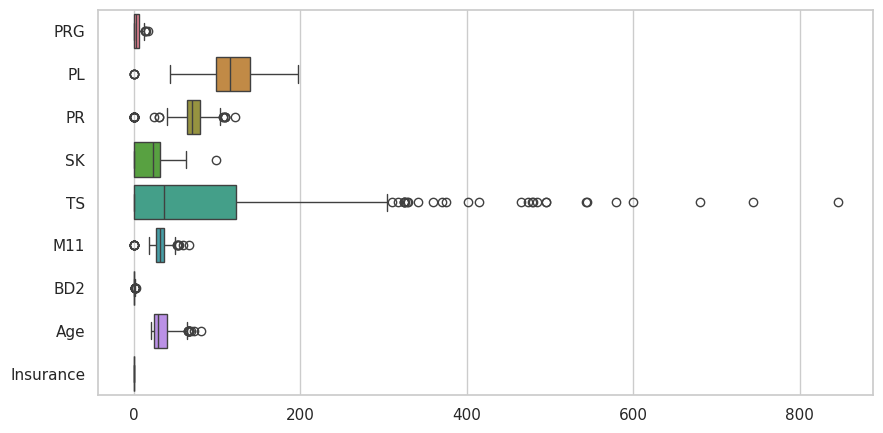

In [30]:
# Box Plot for all numerical features
sns.boxplot(data=sepsis_train_df, orient='h')

***
# ✍️ Спостереження
***

>- У наборі поїздів є чимало викидів, особливо в колонці `TS`. Ці викиди будуть досліджені більш ретельно.
>- Деякі стовпці дуже малі в поточному масштабі, тому вони нанесені окремо для більш чіткого візуалізації:

<Axes: >

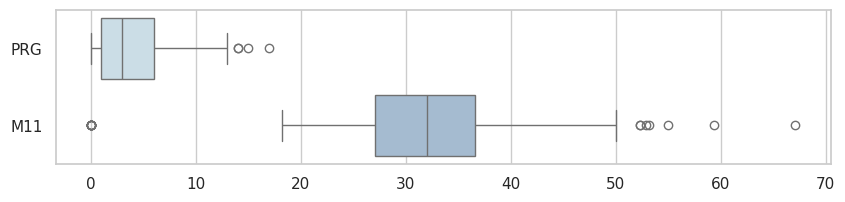

In [31]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=sepsis_train_df[['PRG', 'M11']], orient='h')

<Axes: xlabel='BD2'>

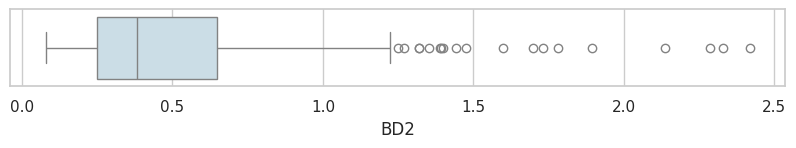

In [32]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=sepsis_train_df['BD2'], orient='h')

***
# ✍️ Спостереження
***

> Усі стовпці `PRG`, `M11` і `BD2` мають викиди. Викиди будуть розглянуті в наступному розділі.

<a id='III'></a>
<h2 style='color:#4472C4;font-size:45px;font-family:helvetica;text-align:center;'>
    <strong>
    III. Очищення та попередня обробка даних
    </strong>
</h2>

<a id='3.1'></a>
### **3.1.** Видаліть стовпці **`ID`**, **`Insurance`** і перейменуйте стовпець **`Sepsis`** з помилкою

# ✍ Спостереження:
> - Щоб захистити конфіденційність пацієнтів, їхні статуси **`ID`** і **`Insurance`** будуть видалені перед годуванням для навчання моделі. Крім того, стовпець **`ID`** може спричинити витік даних [1].
- Стовпець **`Sepsis`** у вихідному кадрі даних вказано з орфографічною помилкою (Sepssis), тому його змінено на правильне написання (Sepsis), щоб уникнути плутанини.

In [33]:
# Drop ID (both sets) and Insurance (test set) columns
sepsis_train_df.drop(columns=['ID', 'Insurance'], axis='columns', inplace=True)
sepsis_test_df.drop(columns=['Insurance'], axis='columns', inplace=True)

# Rename the misspelled Sepsis column
sepsis_train_df.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

<a id='3.2'></a>
### **3.2.** Двійкове кодування для стовпця **`Sepsis`**

In [34]:
sepsis_train_df['Sepsis'].unique()

array(['Positive', 'Negative'], dtype=object)

✍
> Стовпець **`Sepsis`** містить лише 2 унікальних значення («Позитивний» або «Негативний») типу *об’єкт*. Отже, немає потреби турбуватися про неправильне написання чи використання великих літер.

In [35]:
# Replace Positive with 1 and Negative with 0 in Sepsis column
sepsis_train_df['Sepsis'].replace(to_replace='Positive', value='1', inplace=True)
sepsis_train_df['Sepsis'].replace(to_replace='Negative', value='0', inplace=True)

## Before this column is objective, so after endcoding, change it back to interger to train
sepsis_train_df['Sepsis'] = sepsis_train_df['Sepsis'].astype('int')

sepsis_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     599 non-null    int64  
 1   PL      599 non-null    int64  
 2   PR      599 non-null    int64  
 3   SK      599 non-null    int64  
 4   TS      599 non-null    int64  
 5   M11     599 non-null    float64
 6   BD2     599 non-null    float64
 7   Age     599 non-null    int64  
 8   Sepsis  599 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.2 KB


<ipython-input-35-c4fe2a3e358f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sepsis_train_df['Sepsis'].replace(to_replace='Positive', value='1', inplace=True)
<ipython-input-35-c4fe2a3e358f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [36]:
sepsis_train_df['Sepsis'].unique()

array([1, 0])

✍
> Функція **`Сепсис`** тепер містить лише два значення 1 (вказує на позитивний результат) і 0 (вказує на негативний).

<a id='3.3.'></a>
### **3.3** Видалити повторювані записи


In [37]:
print ('The shape of the training set before dropping duplicates: ' + str(sepsis_train_df.shape))

sepsis_train_df.drop_duplicates(inplace=True)

print ("The shape of the training set after dropping duplicates: " + str(sepsis_train_df.shape))

The shape of the training set before dropping duplicates: (599, 9)
The shape of the training set after dropping duplicates: (599, 9)


In [38]:
print ("The shape of the testing set before dropping duplicates: " + str(sepsis_test_df.shape))

sepsis_test_df.drop_duplicates(inplace=True)

print ("The shape of the testing set after dropping duplicates: " + str(sepsis_test_df.shape))

The shape of the testing set before dropping duplicates: (169, 9)
The shape of the testing set after dropping duplicates: (169, 9)


<a id='3.4'></a>
### **3.4.** Обробляти відсутні значення

✍️
> Згідно з файлом README набору даних, є «Відсутні значення атрибутів. Отже, необхідно перевірити значення Null і NA у записах.

In [39]:
print("Total number of missing values in train set:\n" + str(sepsis_train_df.isna().sum()))
print()
print("Total number of missing values in test set:\n" + str(sepsis_test_df.isna().sum()))

Total number of missing values in train set:
PRG       0
PL        0
PR        0
SK        0
TS        0
M11       0
BD2       0
Age       0
Sepsis    0
dtype: int64

Total number of missing values in test set:
ID     0
PRG    0
PL     0
PR     0
SK     0
TS     0
M11    0
BD2    0
Age    0
dtype: int64


✍️
> Дивно, але немає жодного очевидного пропущеного значення як у тренуванні, так і в тестовому наборі. Однак деякі стовпці мають значення 0:

In [40]:
sepsis_train_df.min()

,0
PRG,0.000
PL,0.000
PR,0.000
SK,0.000
TS,0.000
M11,0.000
BD2,0.078
Age,21.000
Sepsis,0.000


In [41]:
sepsis_test_df.min()

,0
ID,ICU200609
PRG,0
PL,56
PR,0
SK,0
TS,0
M11,0.0
BD2,0.1
Age,21


# ✍️ Спостереження
> Тому можна припустити, що відсутні значення заповнено 0. Оскільки 0 може мати значний вплив на середнє значення, нульові значення буде замінено медіаною стовпця.

In [42]:
sepsis_train_df['PRG'] = sepsis_train_df['PRG'].replace(0,sepsis_test_df['PRG'].mean())
sepsis_train_df['PL'] = sepsis_train_df['PL'].replace(0,sepsis_test_df['PL'].mean())
sepsis_train_df['PR'] = sepsis_train_df['PR'].replace(0,sepsis_test_df['PR'].mean())
sepsis_train_df['SK'] = sepsis_train_df['SK'].replace(0,sepsis_test_df['SK'].mean())
sepsis_train_df['TS'] = sepsis_train_df['TS'].replace(0,sepsis_test_df['TS'].mean())
sepsis_train_df['M11'] = sepsis_train_df['M11'].replace(0,sepsis_test_df['M11'].mean())


In [43]:
sepsis_train_df.min()

,0
PRG,1.000
PL,44.000
PR,24.000
SK,7.000
TS,14.000
M11,18.200
BD2,0.078
Age,21.000
Sepsis,0.000


In [44]:
sepsis_test_df.min()

,0
ID,ICU200609
PRG,0
PL,56
PR,0
SK,0
TS,0
M11,0.0
BD2,0.1
Age,21


<a id='3.5'></a>
### **3.5.** Обробка викидів і асиметрії даних

<Axes: >

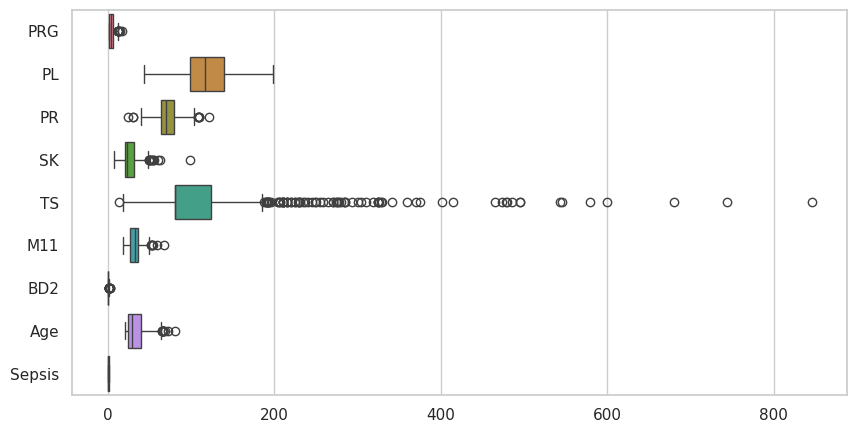

In [45]:
# Boxplot to see the outlier of each numerical column
sns.boxplot(data=sepsis_train_df, orient="h")

# ✍️ Спостереження

> Є деякі відхилення, тому я хочу їх розглянути


## **Перекіс**

In [47]:
# Select only numeric columns
numeric_columns_test = sepsis_test_df.select_dtypes(include=['number'])

# Compute skewness
skew_values = numeric_columns_test.skew().sort_values(ascending=False)
print(skew_values)



TS     1.747436
BD2    1.559577
Age    1.049232
PRG    0.866427
PL     0.531711
SK    -0.096263
M11   -0.520007
PR    -1.768116
dtype: float64


In [48]:
sepsis_train_df.skew().sort_values(ascending=False)


,0
TS,3.423878
BD2,1.989472
SK,1.324433
Age,1.152353
PRG,1.074388
Sepsis,0.643311
M11,0.626539
PL,0.538164
PR,0.154067


In [49]:
sepsis_train_df['TS'] = np.log(sepsis_train_df['TS'])
sepsis_train_df['BD2'] = np.log(sepsis_train_df['BD2'])
sepsis_train_df['SK'] = np.log(sepsis_train_df['SK'])
sepsis_train_df['Age'] = np.log(sepsis_train_df['Age'])
sepsis_train_df['PRG'] = np.log(sepsis_train_df['PRG'])
sepsis_train_df['M11'] = np.log(sepsis_train_df['M11'])
sepsis_train_df['PL'] = np.log(sepsis_train_df['PL'])
sepsis_train_df['PR'] = np.log(sepsis_train_df['PR'])


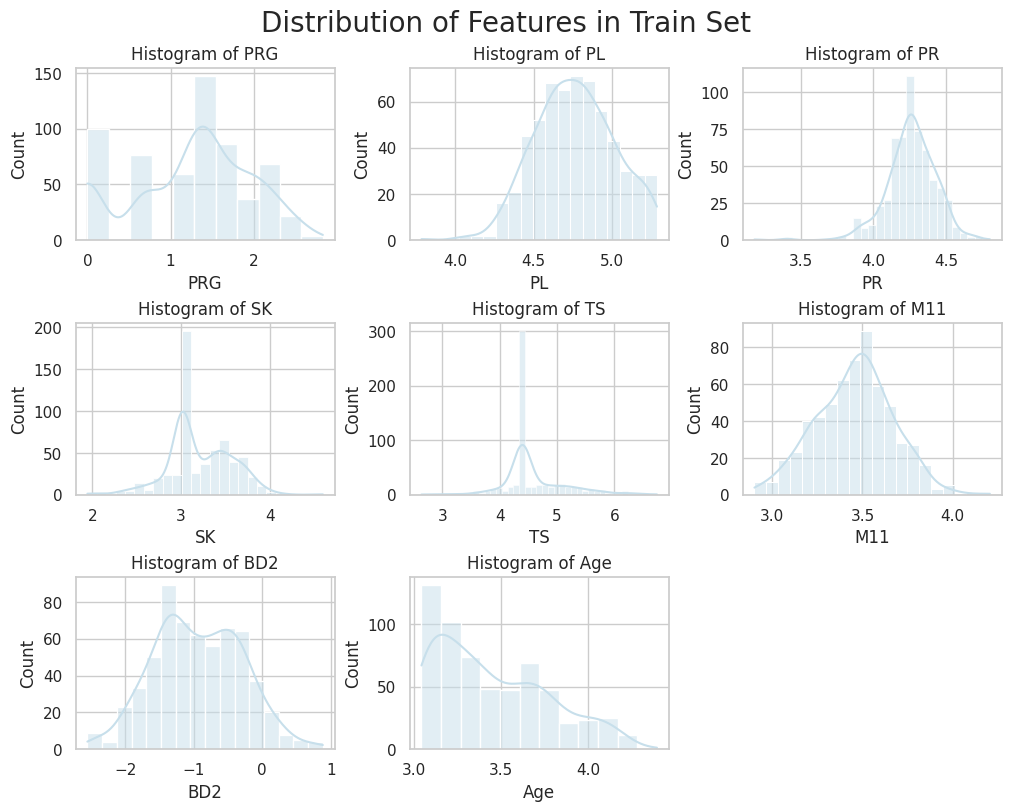

In [50]:
plot_dist(df=sepsis_train_df, avoid=['Sepsis'], name_for_title='Train')

# ✍️ Спостереження

> Діаграма розподілу `TS`, `PRG` і `Age` ще не має форми "нормального розподілу". Крім того, вік і

In [51]:
sepsis_train_df['TS'] = np.where(sepsis_train_df['TS'] > sepsis_train_df['TS'].quantile(0.75),
                                 sepsis_train_df['TS'].quantile(0.75), sepsis_train_df['TS'])
sepsis_train_df['PRG'] = np.where(sepsis_train_df['PRG'] > sepsis_train_df['PRG'].quantile(0.75),
                                 sepsis_train_df['PRG'].quantile(0.75), sepsis_train_df['PRG'])
sepsis_train_df['Age'] = np.where(sepsis_train_df['Age'] > sepsis_train_df['Age'].quantile(0.75),
                                 sepsis_train_df['Age'].quantile(0.75), sepsis_train_df['Age'])

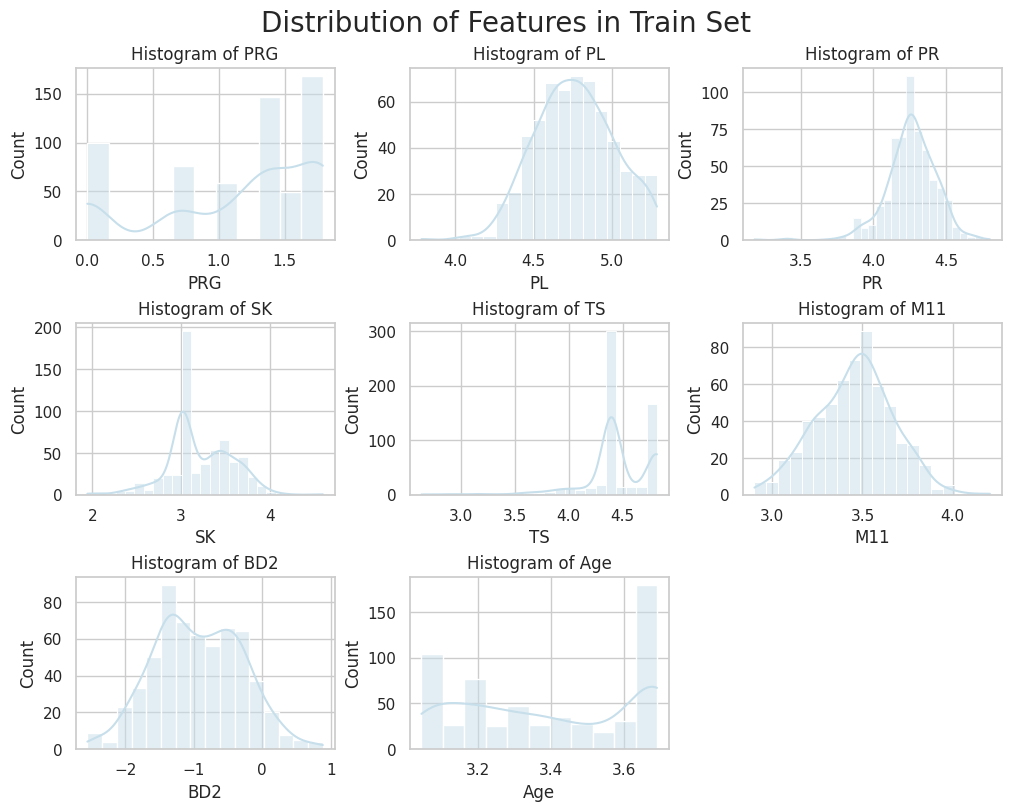

In [52]:
plot_dist(df=sepsis_train_df, avoid=['Sepsis'], name_for_title='Train')

<a id='3.6.'></a>
### **3.6.** Обробляти класи дисбалансу в цільовій змінній (сепсис) і розділяти дані

In [53]:
sepsis_train_df["Sepsis"].value_counts()

,count
Sepsis,
0,391
1,208


In [54]:
from sklearn.utils import resample
# Separate majority and minority classes
sepsis_train_df_majority = sepsis_train_df[sepsis_train_df.Sepsis==0]
sepsis_train_df_minority = sepsis_train_df[sepsis_train_df.Sepsis==1]

# Upsample minority class
sepsis_train_df_minority_upsampled = resample(sepsis_train_df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=391,    # to match majority class
                                 random_state=123) # reproducible results

sepsis_train_df_upsampled = pd.concat([sepsis_train_df_majority, sepsis_train_df_minority_upsampled])

# Display new class counts
sepsis_train_df_upsampled.Sepsis.value_counts()


,count
Sepsis,
0,391
1,391


###
Розбиття даних

In [55]:
X = sepsis_train_df_upsampled.drop('Sepsis', axis=1)
y = sepsis_train_df_upsampled.Sepsis

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=42)

print("Length of X_train: " + str(len(X_train)))
print("Length of X_test: " + str(len(X_test)))

Length of X_train: 625
Length of X_test: 157


<a id='IV'></a>
<h2 style='color:#4472C4;font-size:45px;font-family:helvetica;text-align:center;'>
    <strong>
    IV. Побудова моделі
    </strong>
</h2>

<a id='4.2.'></a>
### **4.2.**
Дерево рішень

## Побудова моделі

In [57]:
# Initialise the model
clf=DecisionTreeClassifier(random_state=42)

# Fit the model with train set
clf.fit(X_train,y_train)

## Use the "X_train" to predict the model outcome -> evaluate the outcome of model in train set.
y_train_predicted=clf.predict(X_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_test_predicted=clf.predict(X_test)

In [58]:
## Check if the model is overfitting or not?
from sklearn.metrics import f1_score, accuracy_score
print("Test F1 Score:" + str(f1_score(y_test, y_test_predicted)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_test_predicted)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_train_predicted)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_train_predicted)))

Test F1 Score:0.8974358974358975
Test Accuracy Score:0.8980891719745223
--------------------------------------------------------
Train F1 Score:1.0
Train Accuracy Score:1.0


# ✍️ Спостереження

> Є велика переобладнання. Однак точність невисока, як очікувалося, тому я буду використовувати процес скорочення та процес налаштування гіперпараметрів, щоб зробити точність однаковою.

## Дерево рішень щодо обрізання

> Обрізка призначена для мінімізації проблеми переобладнання. При обрізанні я хочу зосередитися на забрудненості листя, ефективних альфах (ccp_alphas), кількості вузлів. Графік дерева використовується для визначення глибини дерева, мінімального розколу та мінімального розколу листя для моделі випадкового лісу. Функція важлива також для визначення максимальної функції у випадковому лісі.

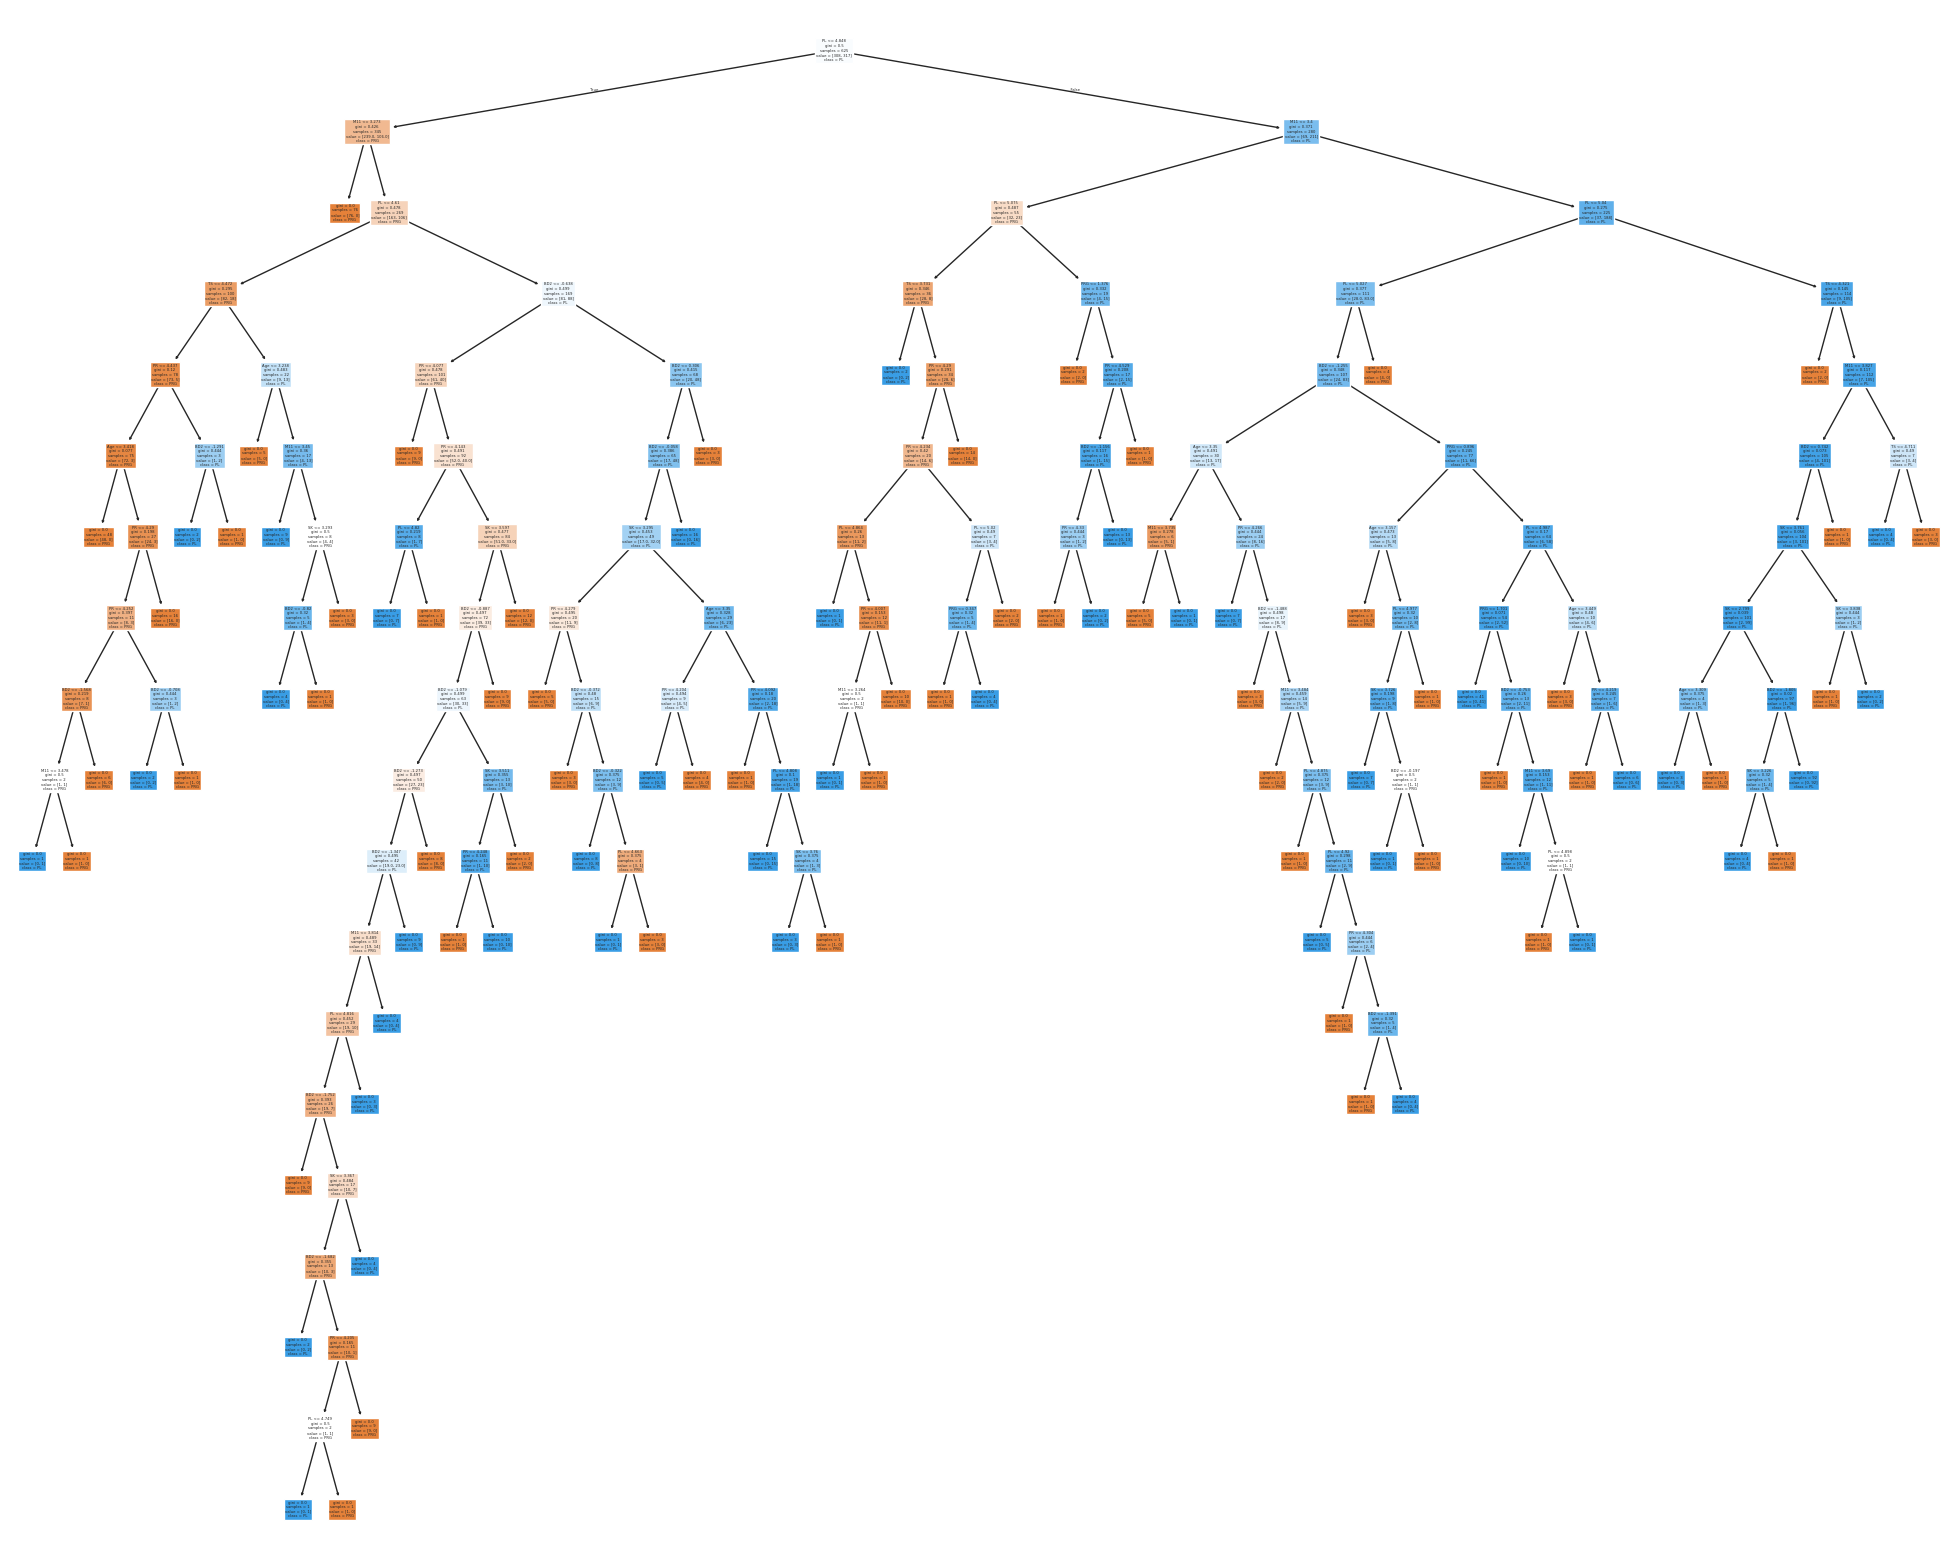

In [59]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'],
                   class_names=['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'],
                   filled=True)

# ✍️ Спостереження


> Відповідно до діаграми дерева max_dept для випадкового лісу становить близько 18-20.

## Важливість функції для цього дерева рішень:
***
Цей призначений для вибору значень для max_feature для навчання пізніше

In [60]:
column_names = X.columns
## feature importance
feature_importances = pd.DataFrame(clf.feature_importances_, index = column_names, columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
PL,0.350672
BD2,0.182382
M11,0.151603
PR,0.109989
SK,0.070897
TS,0.060714
Age,0.052356
PRG,0.021387


Text(0.5, 0, 'Random Forest Feature Importance')

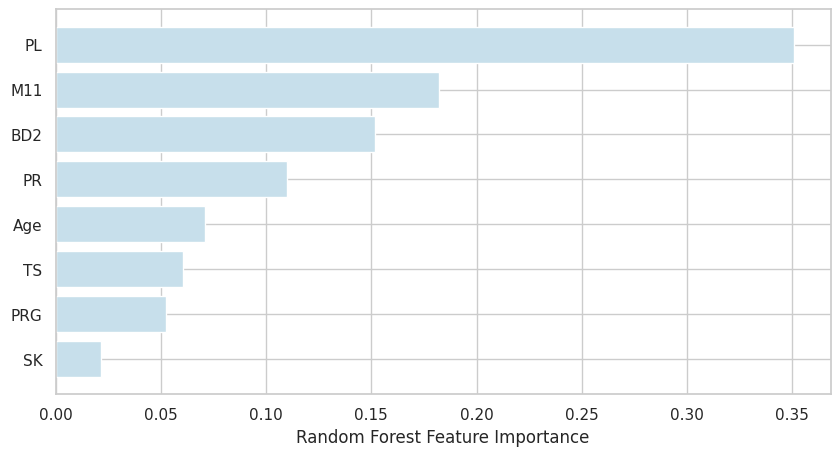

In [61]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(['SK', 'PRG', 'TS', 'Age', 'PR', 'BD2', 'M11', 'PL'], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# ✍️ Спостереження

> У цьому дереві рішень **PL, M11 і BD2** є трьома основними важливими ознаками для класифікації сепсису, а не сепсису.

In [62]:
path=clf.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha will give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha will give list of values : [0.         0.0014     0.00142222 0.00145455 0.00146667 0.00146667
 0.0015     0.00151579 0.00155385 0.001604   0.00161481 0.00174545
 0.00196364 0.00213333 0.00227556 0.0024     0.00248205 0.00256
 0.00256    0.00261213 0.00264706 0.00266667 0.00272842 0.00274286
 0.0028     0.00290909 0.0029893  0.00308571 0.00326723 0.00351373
 0.00361412 0.00362503 0.00384    0.0040364  0.00409935 0.00434381
 0.0044582  0.00447552 0.00447552 0.00448    0.00449231 0.00459629
 0.00464218 0.00464578 0.00482842 0.00500416 0.00552632 0.00570239
 0.00582907 0.0060553  0.00641482 0.00722995 0.01248465 0.01280544
 0.01523946 0.0233375  0.02463698 0.02944448 0.09852572]
***********************************************************
Impurities in Decision Tree : [0.         0.0028     0.00564444 0.00855354 0.01148687 0.0144202
 0.0174202  0.02045178 0.02977486 0.03619086 0.03942049 0.04465685
 0.04662049 0.04875382 0.05102938 0.05342938 0.05591143 0.05847143
 0.06103143 0.06

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

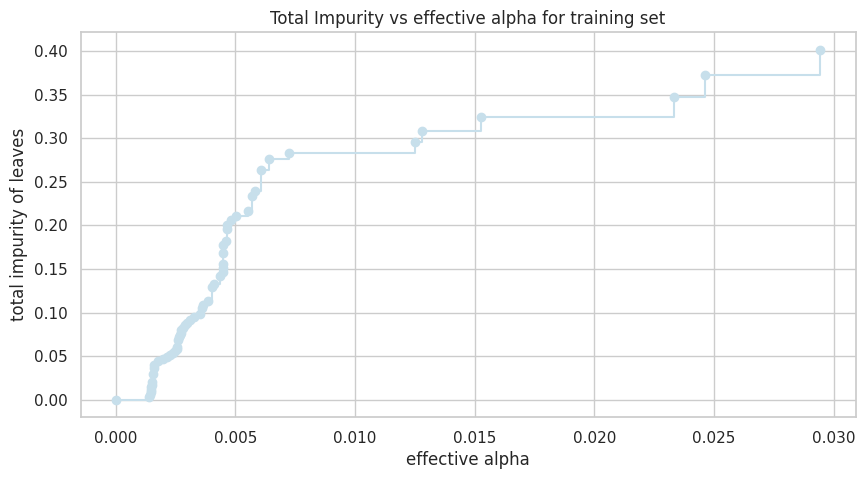

In [63]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [64]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,
                                                                                  ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.09852571958592121


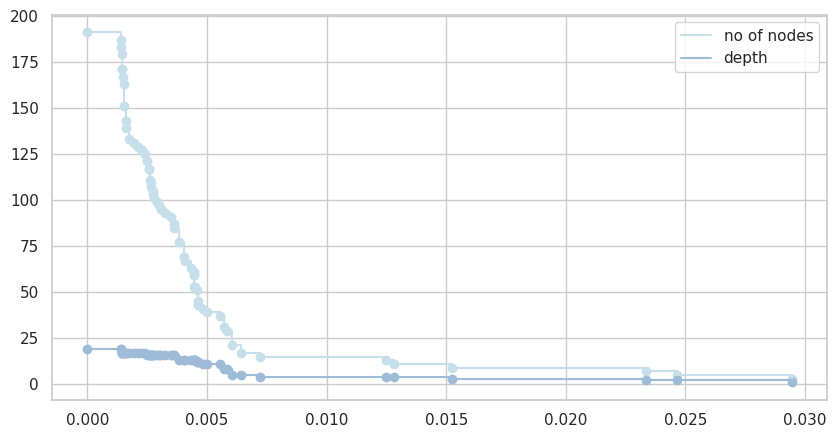

In [65]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

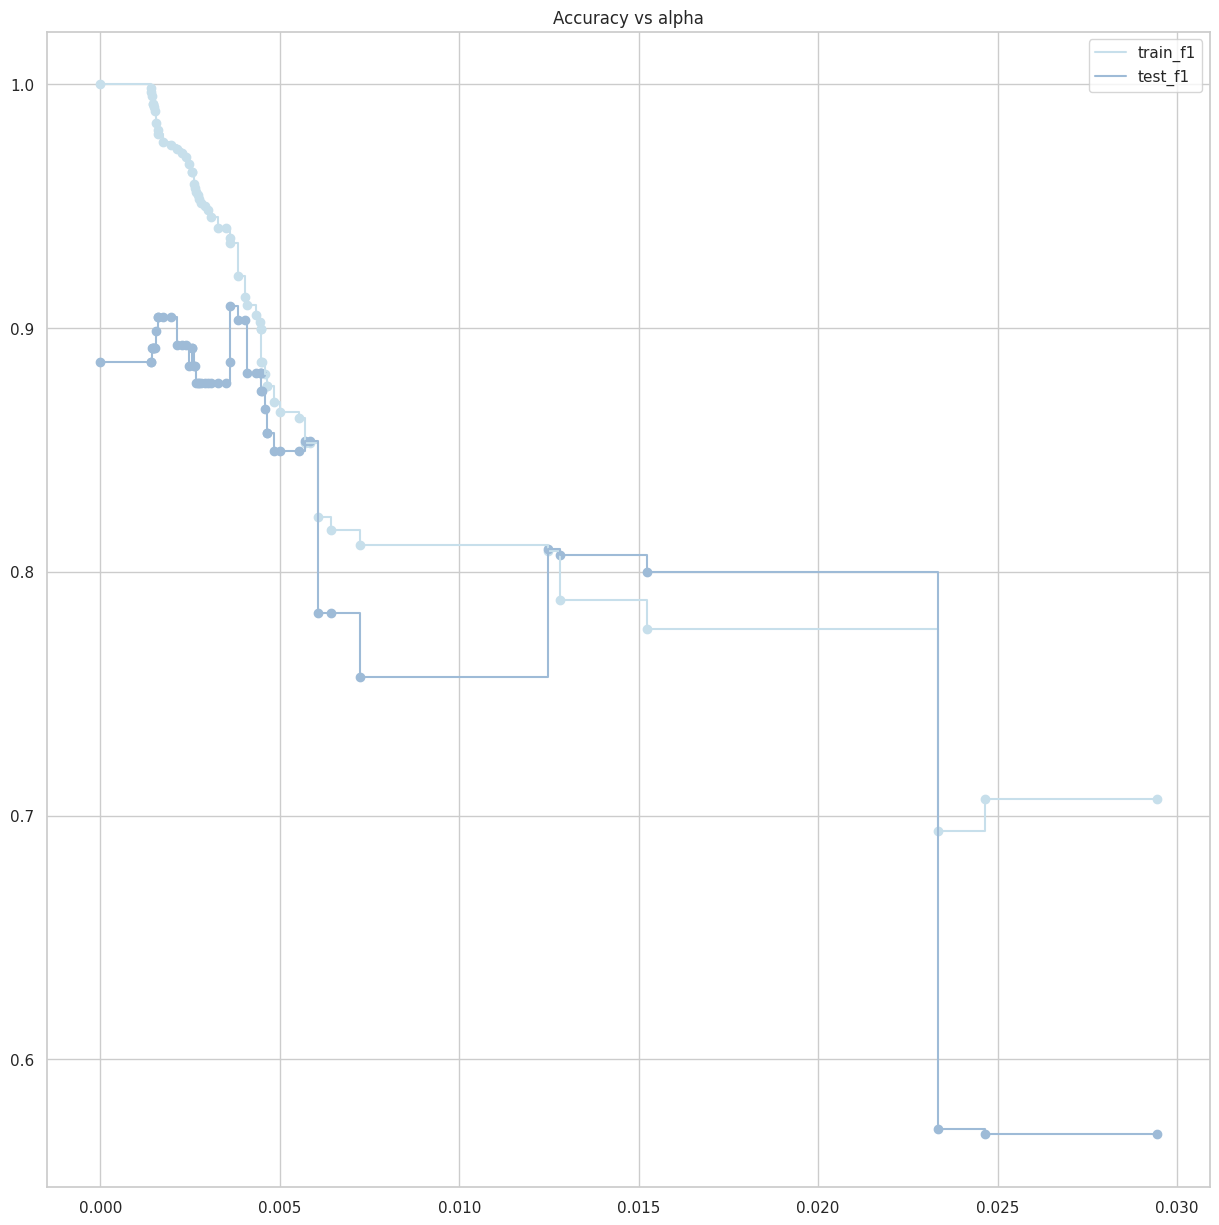

In [66]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(f1_score(y_train_pred,y_train))
    test_acc.append(f1_score(y_test_pred,y_test))
plt.figure(figsize=(15,15))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# ✍️ Спостереження

> Відповідно до цього графіка, ccp_alpha, який має майже рівний набір тренувань і тестів, становить 0,005

In [67]:
# Initialise the model
clf=DecisionTreeClassifier(random_state=42,ccp_alpha=0.004, max_depth= 20, max_leaf_nodes = 90, min_impurity_decrease=0.0001)

# Fit the model with train set
clf.fit(X_train,y_train)

## Use the "X_train" to predict the model outcome -> evaluate the outcome of model in train set.
y_train_predicted = clf.predict(X_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_test_predicted = clf.predict(X_test)

In [68]:
## Check if the model is overfitting or not?
from sklearn.metrics import f1_score, accuracy_score
print("Test F1 Score:" + str(f1_score(y_test, y_test_predicted)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_test_predicted)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_train_predicted)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_train_predicted)))

Test F1 Score:0.9240506329113924
Test Accuracy Score:0.9235668789808917
--------------------------------------------------------
Train F1 Score:0.9310872894333844
Train Accuracy Score:0.928


In [69]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.87      0.99      0.92        74

    accuracy                           0.92       157
   macro avg       0.93      0.93      0.92       157
weighted avg       0.93      0.92      0.92       157



In [70]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.96      0.90      0.92       308
           1       0.90      0.96      0.93       317

    accuracy                           0.93       625
   macro avg       0.93      0.93      0.93       625
weighted avg       0.93      0.93      0.93       625



AUC score: 0.9269781830022793


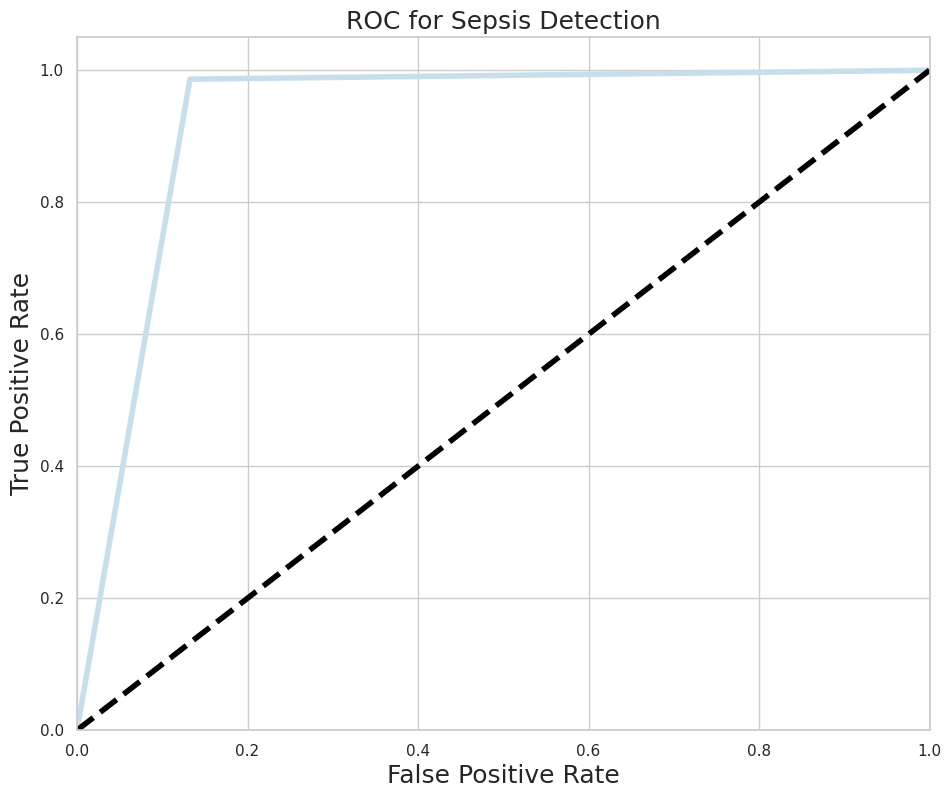

In [71]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_predicted)

ROC_AUC = auc(false_positive_rate, true_positive_rate)
print("AUC score: " + str(ROC_AUC))

plt.figure(figsize =[11,9])
plt.plot(false_positive_rate, true_positive_rate, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Sepsis Detection', fontsize= 18)
plt.show()

## Модель гіперналаштування

In [72]:
import optuna
from datetime import datetime
from sklearn.pipeline import Pipeline

def objective(trial):

    pipeline = Pipeline([
        #Can change if gpu support is implementted
        ("DecisionTreeClassifier", DecisionTreeClassifier())

    ])

    params = {
        "DecisionTreeClassifier__ccp_alpha" :0.004,
        "DecisionTreeClassifier__max_depth": 20,
        "DecisionTreeClassifier__splitter":trial.suggest_categorical("splitter", ["best", "random"]),
        "DecisionTreeClassifier__criterion":trial.suggest_categorical("criterion", ["entropy","entropy", "gini"]),
        "DecisionTreeClassifier__min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 200),
        "DecisionTreeClassifier__max_leaf_nodes": 90,
        "DecisionTreeClassifier__random_state": 42,

    }

     # Fit the model
    model = pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    scores = f1_score(y_pred, y_test)

    try:
        scores = f1_score(y_pred, y_test)
        return scores
    except:
        return 0

study = optuna.create_study(direction='maximize',
                            storage="sqlite:///db.sqlite3",  # Specify the storage URL here.
                            study_name=datetime.utcnow())

[I 2025-05-06 17:37:59,189] A new study created in RDB with name: 2025-05-06 17:37:55.979411


In [73]:
study.optimize(objective, n_trials=2000)

[I 2025-05-06 17:38:05,221] Trial 0 finished with value: 0.46846846846846846 and parameters: {'splitter': 'random', 'criterion': 'entropy', 'min_samples_leaf': 165}. Best is trial 0 with value: 0.46846846846846846.
[I 2025-05-06 17:38:05,539] Trial 1 finished with value: 0.5692307692307692 and parameters: {'splitter': 'best', 'criterion': 'entropy', 'min_samples_leaf': 162}. Best is trial 1 with value: 0.5692307692307692.
[I 2025-05-06 17:38:05,666] Trial 2 finished with value: 0.6 and parameters: {'splitter': 'random', 'criterion': 'entropy', 'min_samples_leaf': 40}. Best is trial 2 with value: 0.6.
[I 2025-05-06 17:38:05,784] Trial 3 finished with value: 0.6811594202898551 and parameters: {'splitter': 'random', 'criterion': 'gini', 'min_samples_leaf': 21}. Best is trial 3 with value: 0.6811594202898551.
[I 2025-05-06 17:38:06,170] Trial 4 finished with value: 0.6 and parameters: {'splitter': 'random', 'criterion': 'entropy', 'min_samples_leaf': 45}. Best is trial 3 with value: 0.6811

In [74]:
def print_res(input_study):
    print('Number of finished trials: {}'.format(len(input_study.trials)))
    print('Best trial:')
    trial = input_study.best_trial

    print('  Value: {}'.format(trial.value))
    print('  Params: ')

    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

print_res(study)

Number of finished trials: 2000
Best trial:
  Value: 0.9240506329113924
  Params: 
    splitter: best
    criterion: gini
    min_samples_leaf: 2


In [75]:
# Extract the result
def get_params(input_study) :
    params = {k: v for k, v in input_study.best_params.items() if k not in ('dim_red', 'scalers')}
    change = []
    for k,v in dict(params).items():
        tmp_name = k
        if 'DecisionTreeClassifier' not in tmp_name :
            res = f"DecisionTreeClassifier__{tmp_name}"
            params[res] = params.pop(tmp_name)
            change.append(res)
    return params

params = get_params(study)
params

{'DecisionTreeClassifier__splitter': 'best',
 'DecisionTreeClassifier__criterion': 'gini',
 'DecisionTreeClassifier__min_samples_leaf': 2}

In [76]:
# Initialise the model
clf=DecisionTreeClassifier(random_state=42,ccp_alpha=0.0040, max_depth= 20, max_leaf_nodes = 90, criterion='gini', splitter='best',
                           min_samples_leaf=2
                           )

# Fit the model with train set
clf.fit(X_train,y_train)

## Use the "X_train" to predict the model outcome -> evaluate the outcome of model in train set.
y_train_predicted=clf.predict(X_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_test_predicted=clf.predict(X_test)

In [77]:
## Check if the model is overfitting or not?
print("Test F1 Score:" + str(f1_score(y_test, y_test_predicted)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_test_predicted)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_train_predicted)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_train_predicted)))

Test F1 Score:0.9240506329113924
Test Accuracy Score:0.9235668789808917
--------------------------------------------------------
Train F1 Score:0.9310872894333844
Train Accuracy Score:0.928


AUC score: 0.9269781830022793


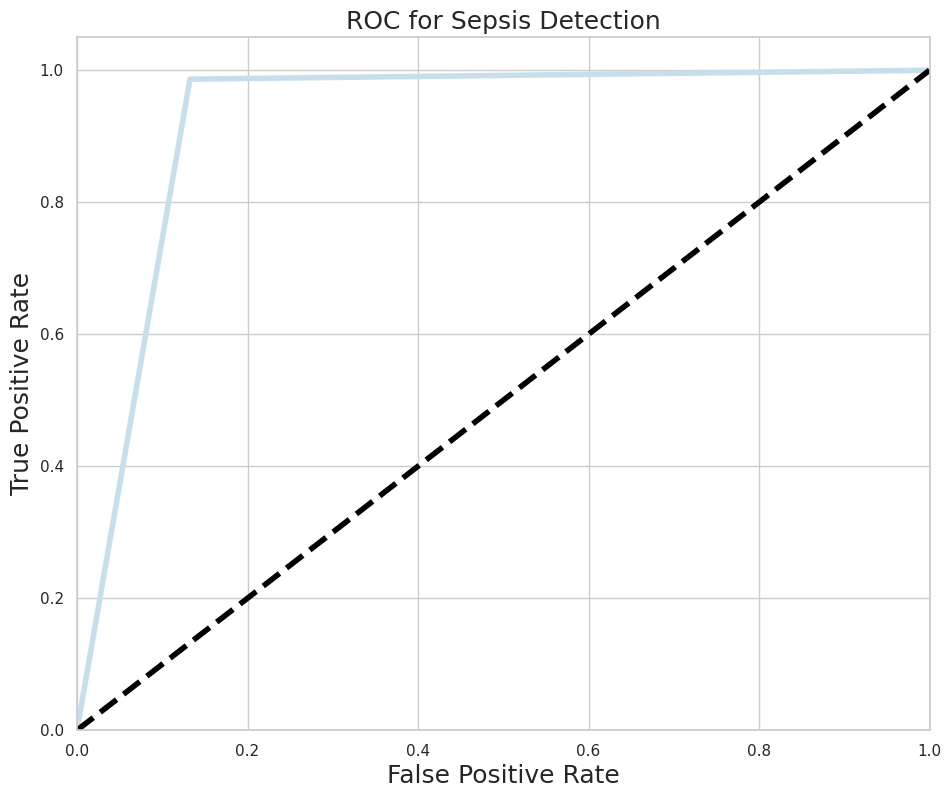

In [78]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_predicted)

ROC_AUC = auc(false_positive_rate, true_positive_rate)
print("AUC score: " + str(ROC_AUC))

plt.figure(figsize =[11,9])
plt.plot(false_positive_rate, true_positive_rate, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Sepsis Detection', fontsize= 18)
plt.show()



```
# Має бути у форматі коду
```

<a id='4.2.'></a>

### **4.2.** Випадковий ліс

### ***Модель збірки***

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Initialise the model
random_forest = RandomForestClassifier(random_state=42,ccp_alpha=0.001, max_depth= 24, max_leaf_nodes = 165,
                                       min_impurity_decrease=0.0001,
                                       criterion='gini',
                                       min_samples_leaf=2,
                                       max_features=6,
                                      )

# Fit the model with train set
random_forest.fit(X_train,y_train)

## Use the "X_train" to predict the model outcome -> evaluate the outcome of model in train set.
y_train_predicted=random_forest.predict(X_train)

## Use the "X_test" to predict the model outcome -> evaluate the outcome of model.
y_test_predicted=random_forest.predict(X_test)

In [80]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Check if the model is overfitting or not?
print("Test F1 Score:" + str(f1_score(y_test, y_test_predicted)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_test_predicted)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_train_predicted)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_train_predicted)))

Test F1 Score:0.9358974358974359
Test Accuracy Score:0.9363057324840764
--------------------------------------------------------
Train F1 Score:0.9858712715855573
Train Accuracy Score:0.9856


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.89      0.99      0.94        74

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.94      0.94      0.94       157



In [82]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       308
           1       0.98      0.99      0.99       317

    accuracy                           0.99       625
   macro avg       0.99      0.99      0.99       625
weighted avg       0.99      0.99      0.99       625



# Представтеся та запишіть, чому висока AUC є хорошою

AUC score: 0.9390263757733637


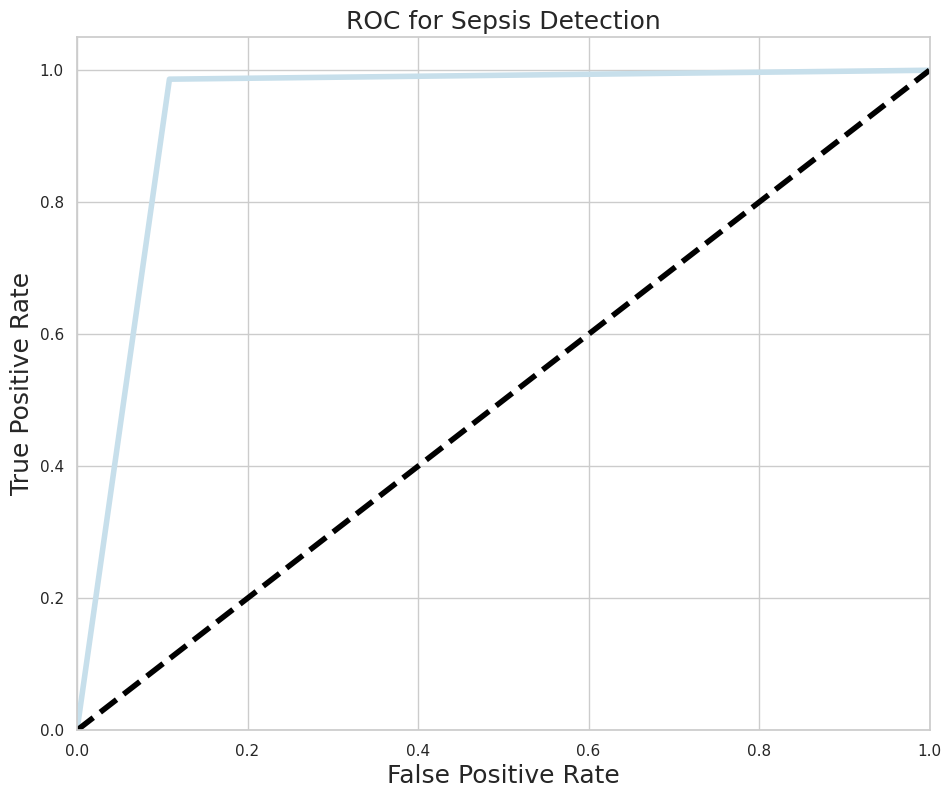

In [83]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_predicted)

ROC_AUC = auc(false_positive_rate, true_positive_rate)
print("AUC score: " + str(ROC_AUC))

plt.figure(figsize =[11,9])
plt.plot(false_positive_rate, true_positive_rate, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Sepsis Detection', fontsize= 18)
plt.show()

### ***Модель гіперналаштування***

In [84]:
import optuna
from datetime import datetime
from sklearn.pipeline import Pipeline

def objective(trial):

    pipeline = Pipeline([
        ("randomForest", RandomForestClassifier())

    ])

    params = {
        "randomForest__ccp_alpha": trial.suggest_float("ccp_alpha", 0.001, 0.0038),
        "randomForest__max_depth": trial.suggest_int("max_depth", 20, 25),
        "randomForest__criterion":trial.suggest_categorical("criterion", ["entropy","gini"]),
        "randomForest__min_samples_split": trial.suggest_int("min_samples_split", 2, 200),
        "randomForest__min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 10),
    }

    # Fit the model
    model = pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    scores = f1_score(y_pred, y_test)

    try:
        scores = f1_score(y_pred, y_test)
        return scores
    except:
        return 0

study = optuna.create_study(direction='maximize',
                            storage="sqlite:///db.sqlite3",  # Specify the storage URL here.
                            study_name=datetime.utcnow())

[I 2025-05-06 17:45:28,550] A new study created in RDB with name: 2025-05-06 17:45:28.458501


In [86]:
study.optimize(objective, n_trials=100)

[I 2025-05-06 17:51:38,116] Trial 792 finished with value: 0.9161290322580645 and parameters: {'ccp_alpha': 0.002758422244778427, 'max_depth': 25, 'criterion': 'entropy', 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 496 with value: 0.9281045751633987.
[I 2025-05-06 17:51:39,069] Trial 793 finished with value: 0.9044585987261147 and parameters: {'ccp_alpha': 0.0028487541518224116, 'max_depth': 21, 'criterion': 'entropy', 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 496 with value: 0.9281045751633987.
[I 2025-05-06 17:51:40,036] Trial 794 finished with value: 0.9161290322580645 and parameters: {'ccp_alpha': 0.0025083883059627446, 'max_depth': 23, 'criterion': 'entropy', 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 496 with value: 0.9281045751633987.
[I 2025-05-06 17:51:40,771] Trial 795 finished with value: 0.89171974522293 and parameters: {'ccp_alpha': 0.002588965629295692, 'max_depth': 23, 'criterion': 'entropy', 'min_samples_split': 1

In [87]:
def print_res(input_study):
    print('Number of finished trials: {}'.format(len(input_study.trials)))
    print('Best trial:')
    trial = input_study.best_trial

    print('  Value: {}'.format(trial.value))
    print('  Params: ')

    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

print_res(study)

Number of finished trials: 892
Best trial:
  Value: 0.9281045751633987
  Params: 
    ccp_alpha: 0.002816941870067163
    max_depth: 25
    criterion: entropy
    min_samples_split: 6
    min_samples_leaf: 2


In [88]:
# Extract the result
def get_params(input_study) :
    params = {k: v for k, v in input_study.best_params.items() if k not in ('dim_red', 'scalers')}
    change = []
    for k,v in dict(params).items():
        tmp_name = k
        if 'randomForest' not in tmp_name :
            res = f"randomForest__{tmp_name}"
            params[res] = params.pop(tmp_name)
            change.append(res)
    return params

params = get_params(study)
params

{'randomForest__ccp_alpha': 0.002816941870067163,
 'randomForest__max_depth': 25,
 'randomForest__criterion': 'entropy',
 'randomForest__min_samples_split': 6,
 'randomForest__min_samples_leaf': 2}

In [89]:
pipeline = Pipeline([
        ("randomForest", RandomForestClassifier( criterion='gini'))
    ])

In [90]:
pipeline.set_params(**params)

Pipeline(steps=[('randomForest',
                 RandomForestClassifier(ccp_alpha=0.002816941870067163,
                                        criterion='entropy', max_depth=25,
                                        min_samples_leaf=2,
                                        min_samples_split=6))])

In [91]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('randomForest',
                 RandomForestClassifier(ccp_alpha=0.002816941870067163,
                                        criterion='entropy', max_depth=25,
                                        min_samples_leaf=2,
                                        min_samples_split=6))])

In [92]:
y_pred = pipeline.predict(X_test)
y_train_predicted = pipeline.predict(X_train)

In [93]:
## Check if the model is overfitting or not?
print("Test F1 Score:" + str(f1_score(y_test, y_pred)))
print("Test Accuracy Score:" + str(accuracy_score (y_test, y_pred)))
print("--------------------------------------------------------")
print("Train F1 Score:" + str(f1_score (y_train, y_train_predicted)))
print("Train Accuracy Score:" + str(accuracy_score (y_train, y_train_predicted)))

Test F1 Score:0.9150326797385621
Test Accuracy Score:0.9171974522292994
--------------------------------------------------------
Train F1 Score:0.9826224328593997
Train Accuracy Score:0.9824


In [94]:
f1_score(y_pred, y_test)

0.9150326797385621

AUC score: 0.9187561055030935


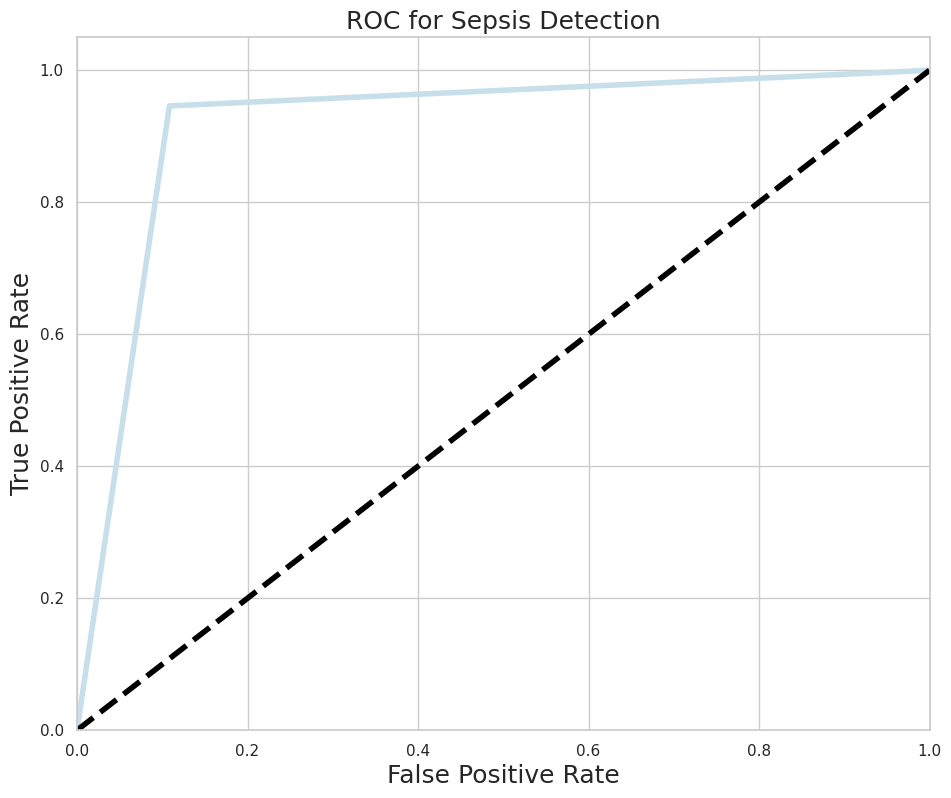

In [95]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

ROC_AUC = auc(false_positive_rate, true_positive_rate)
print("AUC score: " + str(ROC_AUC))

plt.figure(figsize =[11,9])
plt.plot(false_positive_rate, true_positive_rate, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Sepsis Detection', fontsize= 18)
plt.show()

<a id='V'></a>
<h2 style='color:#4472C4;font-size:45px;font-family:helvetica;text-align:center;'>
    <strong>
    V. Висновки
    </strong>
</h2>

<a id='VI'></a>
<h2 style='color:#4472C4;font-size:45px;font-family:helvetica;text-align:center;'>
    <strong>
    VI. Використані джерела
    </strong>
</h2>

<a id='1'></a>
[1] https://www.cdc.gov/sepsis/what-is-sepsis.html#:~:text=Sepsis%20is%20the%20body's%20extreme,%2C%20skin%2C%20or%20gastrointestinal%20tract.